# Regression Analysis

# Problem Statement

There are 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Goal
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# Features

MSSubClass: Identifies the type of dwelling involved in the sale.	

MSZoning: Identifies the general zoning classification of the sale.
		
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

LandContour: Flatness of the property
	
Utilities: Type of utilities available
	
LotConfig: Lot configuration

LandSlope: Slope of property
	
Neighborhood: Physical locations within Ames city limits
		
Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

BldgType: Type of dwelling
	
HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house
	
OverallCond: Rates the overall condition of the house
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)
	
MasVnrType: Masonry veneer type
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 

ExterCond: Evaluates the present condition of the material on the exterior	
		
Foundation: Type of foundation
		
BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning
		
Electrical: Electrical system
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
	
Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories
	
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

		
SaleCondition: Condition of sale


# 1. Importing the packages

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [69]:
df = pd.read_csv('train.csv')

In [70]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [71]:
print(df.shape)

(1460, 81)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
# Dropping id which has no significance with price

In [74]:
df = df.drop('Id',axis = 1)

In [75]:
# MS Sub CLass is a dwelling type hence converting it to categorical

In [76]:
df['MSSubClass'] = df['MSSubClass'].astype(np.object)

In [77]:
# OverallQual and OverallCond are ordinal variables hence converting them as well to categorical

In [78]:
df['OverallQual'] = df['OverallQual'].astype(np.object)

In [79]:
df['OverallCond'] = df['OverallCond'].astype(np.object)

# 2. Checking for missing values

In [80]:
df.isnull().sum()/len(df)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [81]:
# Filling the missing values

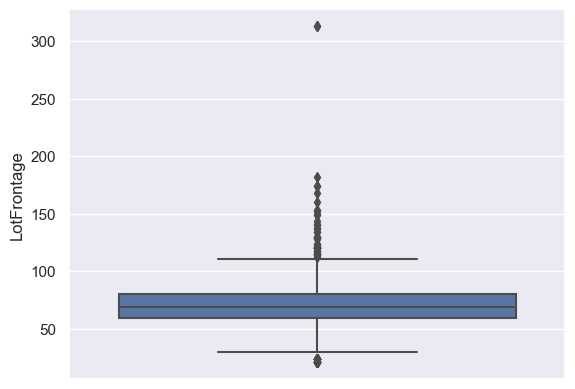

In [82]:
#Checking for outlier for 'LotFrontage'

sns.boxplot(y = 'LotFrontage',data = df )
plt.show()

In [83]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [84]:
# Since the data description mentions that NA is No alley access imputing missing value as No alley access - 'None'
df['Alley'] = df['Alley'].fillna('None')

In [85]:
#Cheking the max value count for 'MasVnrType'
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [86]:
#Imputing with mode/max value of 'MasVnrType' - 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')

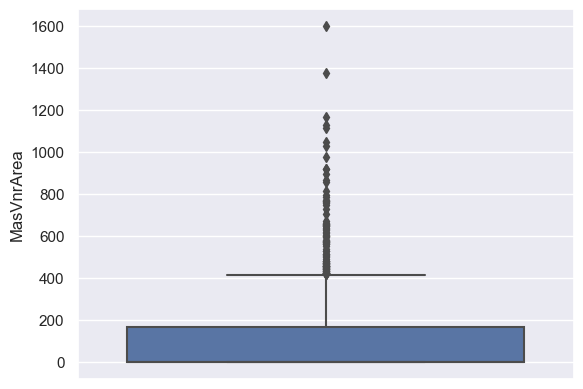

In [87]:
#Checking for Outlier in 'MasVnrArea'
sns.boxplot(y = 'MasVnrArea' , data = df)
plt.show()

In [88]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [89]:
# Since the data description mentions that NA is No basement imputing missing value as No Basemet - 'None'
df['BsmtQual'] = df['BsmtQual'].fillna('None')

In [90]:
# Since the data description mentions that NA is No basement imputing missing value as No Basemet - 'None'
df['BsmtCond'] = df['BsmtCond'].fillna('None')

In [91]:
# Since the data description mentions that NA is No basement imputing missing value as No Basemet - 'None'
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')

In [92]:
# Since the data description mentions that NA is No basement imputing missing value as No Basemet - 'None'
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')

In [93]:
# Since the data description mentions that NA is No basement imputing missing value as No Basemet - 'None'
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [94]:
#Cheking the max value count for 'MasVnrType'
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [95]:
#Imputing with mode/max value of 'Electrical' - 'SBrkr'
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [96]:
# Since the data description mentions that NA is No Fireplace imputing missing value as No Fireplace - 'None'
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [97]:
# Since the data description mentions that NA is No Garage imputing missing value as No Garage - 'None'
df['GarageType'] = df['GarageType'].fillna('None')

In [98]:
# Since the data description mentions that NA is No Garage imputing missing value 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [99]:
# Since the data description mentions that NA is No Garage imputing missing value as No Garage - 'None'
df['GarageFinish'] = df['GarageFinish'].fillna('None')

In [100]:
# Since the data description mentions that NA is No Garage imputing missing value as No Garage - 'None'
df['GarageQual'] = df['GarageQual'].fillna('None')

In [101]:
# Since the data description mentions that NA is No Garage imputing missing value as No Garage - 'None'
df['GarageCond'] = df['GarageCond'].fillna('None')

In [102]:
# Since the data description mentions that NA is No Pool imputing missing value as No Pool - 'None'
df['PoolQC'] = df['PoolQC'].fillna('None')

In [103]:
# Since the data description mentions that NA is No Fence imputing missing value as No Fence - 'None'
df['Fence'] = df['Fence'].fillna('None')

In [104]:
# Since the data description mentions that NA is None imputing missing value as None
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [105]:
df.isnull().sum()/len(df)*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [106]:
from datetime import datetime
df['CurrentYear'] = datetime.now().year

In [107]:
#Finding the age of the house
df['BuildingAge'] = df['CurrentYear'] - df['YearBuilt']

#Finding the age of remodelling of the house
df['RemodAge'] = df['CurrentYear'] - df['YearRemodAdd']

#Finding the age of garage in the house
df['GarageAge'] = df['CurrentYear'] - df['GarageYrBlt']

#Finding the age of sale of the house
df['AgeSold'] = df['CurrentYear'] - df['YrSold']

df['GarageAge'].replace(2023,0,inplace = True)

#Dropping 'CurrentYear','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold' and 'YrSold'
df = df.drop(['CurrentYear','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1)

In [108]:
#Dropping 'BsmtFinSF1','BsmtFinSF2' and 'BsmtUnfSF' as their total is 'TotalBsmtSF'
# Dropping '1stFlrSF' and '2ndFlrSF', 'LowQualFinSF' as their total is 'GrLivArea'

In [109]:
df = df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF'], axis = 1)

# 3. EDA

In [110]:
df.describe().T

count           mean           std      min        25%  \
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   
BuildingAge    1460.0      51.732192     30.202904     13.0      23.00   
RemodAge       1460.0      38.134247     20.645407     13.0      19.00   
GarageAge      1460.0      42.025342     26.068188      0.0      20.00   
AgeSold        1460.0      15.184247      1.328095     13.0      14.00   

                    50%        75%       max  
LotFrontage        69.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
MasVnrArea          0.0     164.25    1600.0  
TotalBsmtSF       991.5    1298.25    6110.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
3SsnPorch           0.0       0.00     508.0  
ScreenPorch         0.0       0.00     480.0  
PoolArea            0.0       0.00     738.0  
MiscVal             0.0       0.00   15500.0  
SalePrice      163000.0  214000.00  755000.0  
BuildingAge        50.0      69.00     151.0  
RemodAge           29.0      56.00      73.0  
GarageAge          38.5      61.00     123.0  
AgeSold            15.0      16.00      17.0

In [111]:
categorical_columns = (df.select_dtypes(include=['object']).copy())

In [112]:
numeric_columns = (df.select_dtypes(include=['int64', 'float64']).copy())

In [113]:
categorical_columns.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual  \
0          Gd        Typ        None     Attchd          RFn         TA   
1          TA        Typ          TA     Attchd          RFn         TA   
2          Gd        Typ          TA     Attchd          RFn         TA   
3          Gd        Typ          Gd     Detchd          Unf         TA   
4          Gd        Typ          TA     Attchd          RFn         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0         TA          Y   None  None        None       WD        Normal  
1         TA          Y   None  None        None       WD        Normal  
2         TA          Y   None  None        None       WD        Normal  
3         TA          Y   None  None        None       WD       Abnorml  
4         TA          Y   None  None        None       WD        Normal

In [114]:
numeric_columns.head()

LotFrontage  LotArea  MasVnrArea  TotalBsmtSF  GrLivArea  BsmtFullBath  \
0         65.0     8450       196.0          856       1710             1   
1         80.0     9600         0.0         1262       1262             0   
2         68.0    11250       162.0          920       1786             1   
3         60.0     9550         0.0          756       1717             1   
4         84.0    14260       350.0         1145       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  BuildingAge  \
0          0            0         0        0     208500           20   
1          0            0         0        0     181500           47   
2          0            0         0        0     223500           22   
3          0            0         0        0     140000          108   
4          0            0         0        0     250000           23   

   RemodAge  GarageAge  AgeSold  
0        20       20.0       15  
1        47       47.0       16  
2        21       22.0       15  
3        53       25.0       17  
4        23       23.0       15

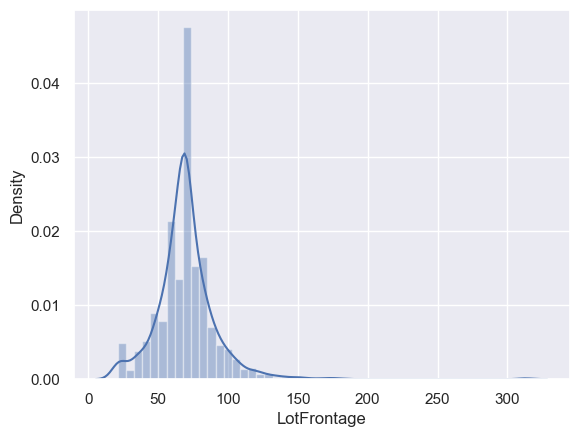

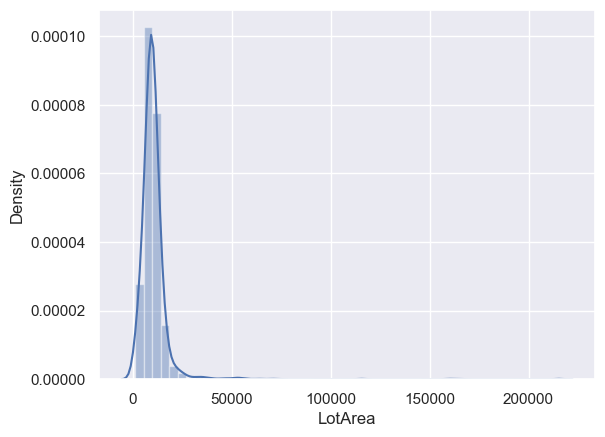

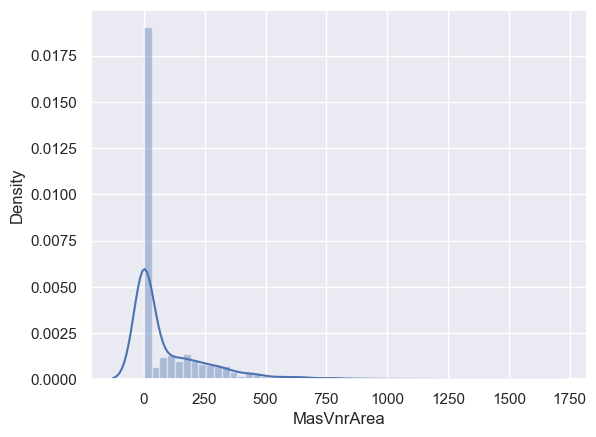

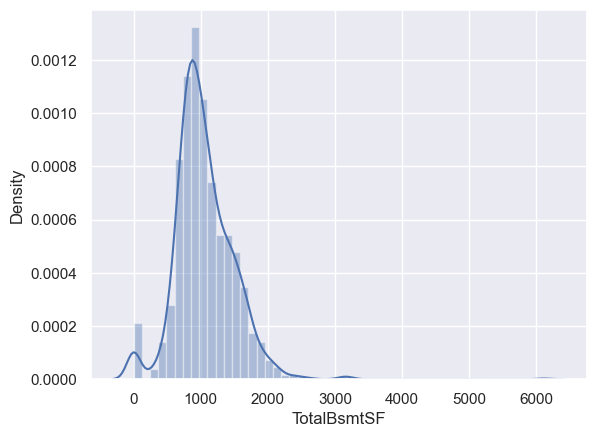

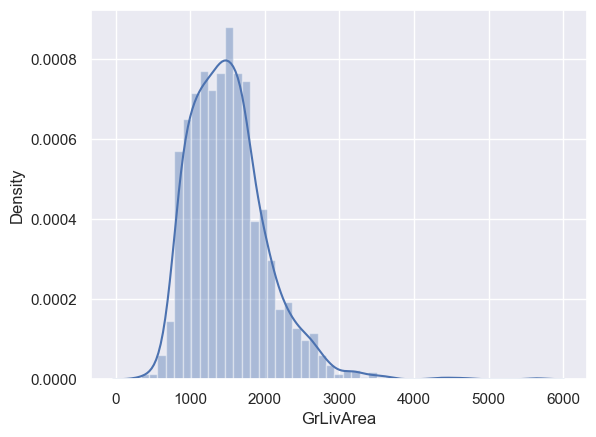

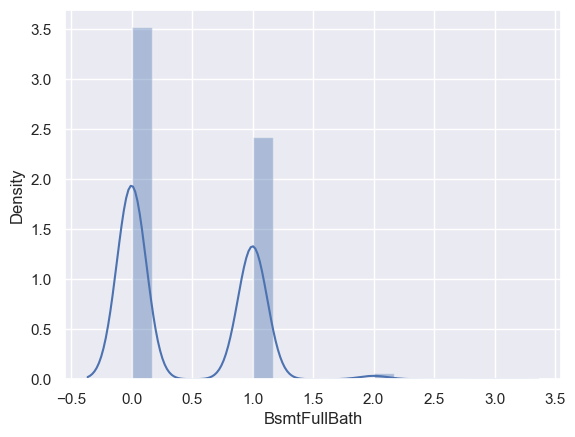

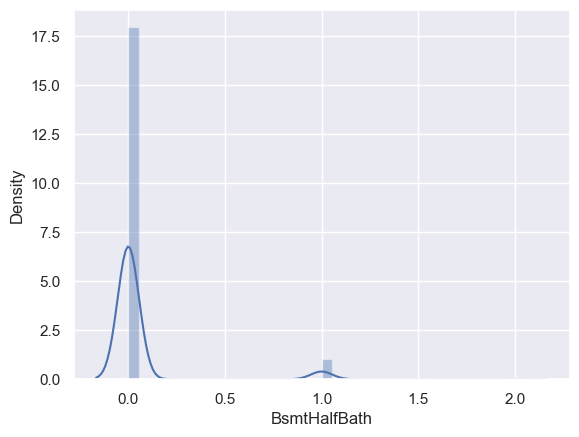

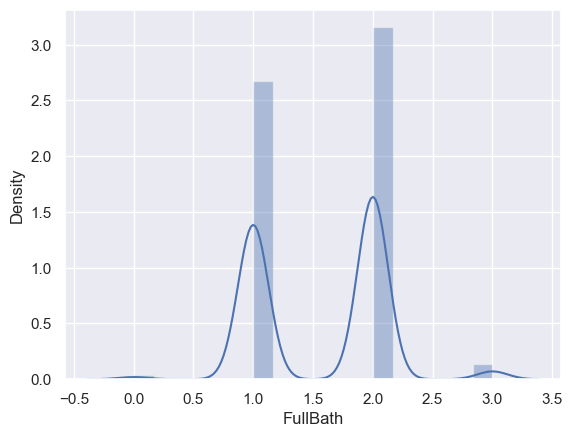

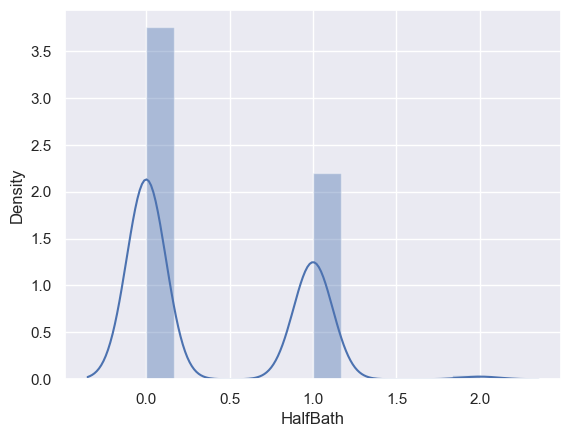

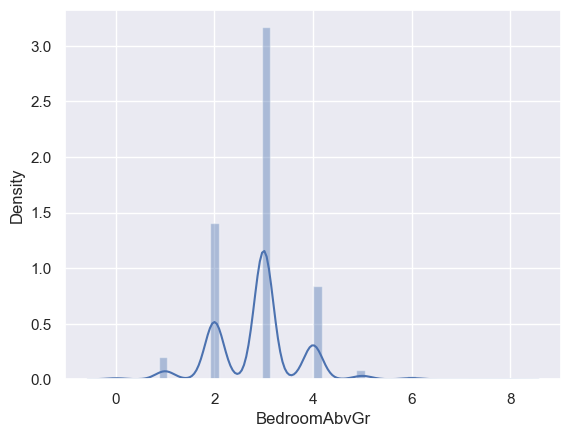

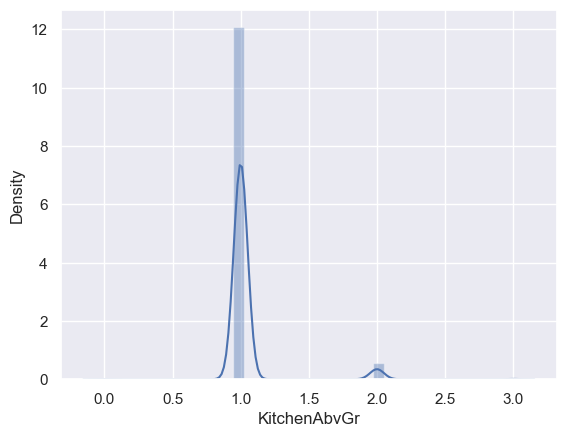

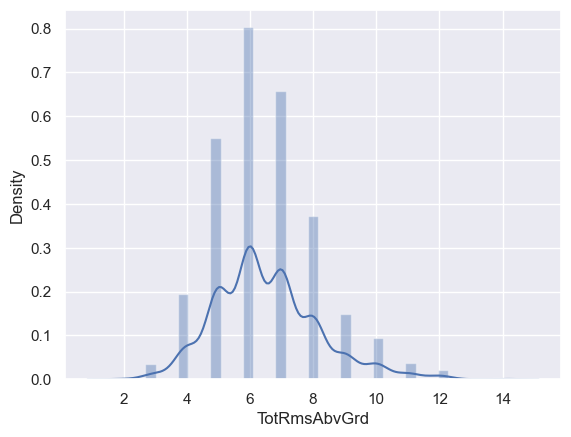

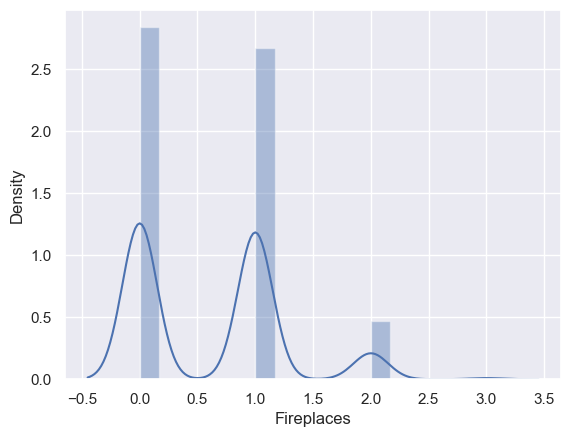

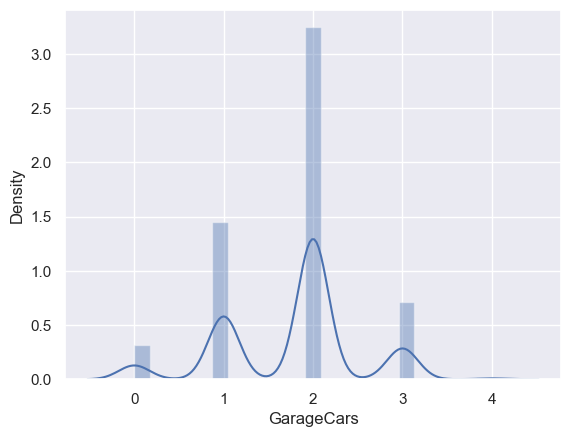

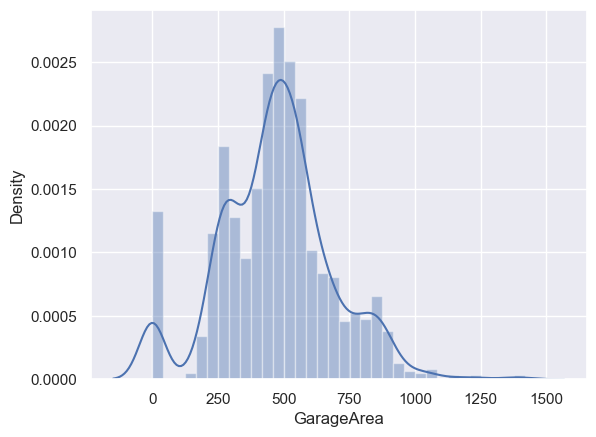

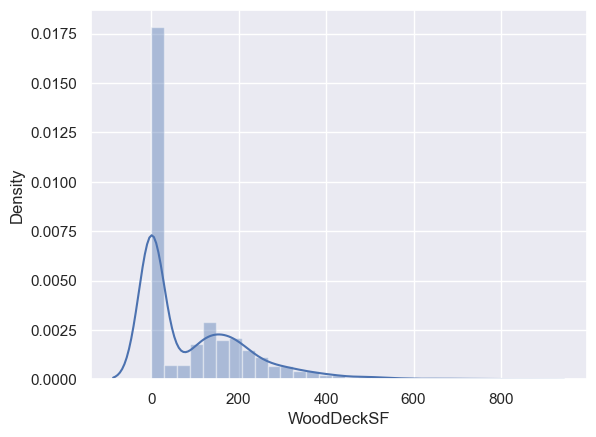

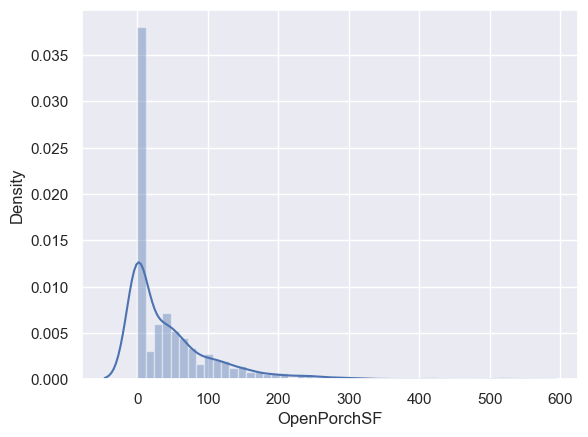

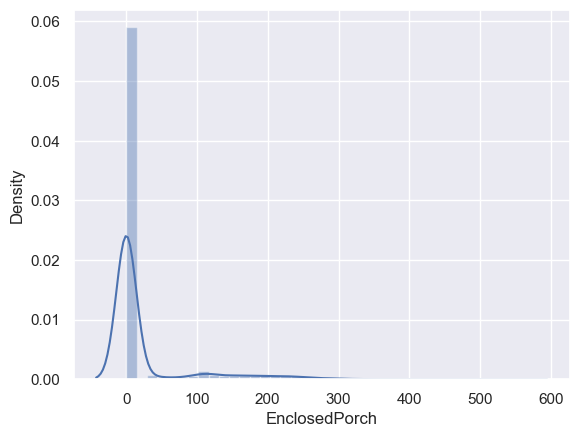

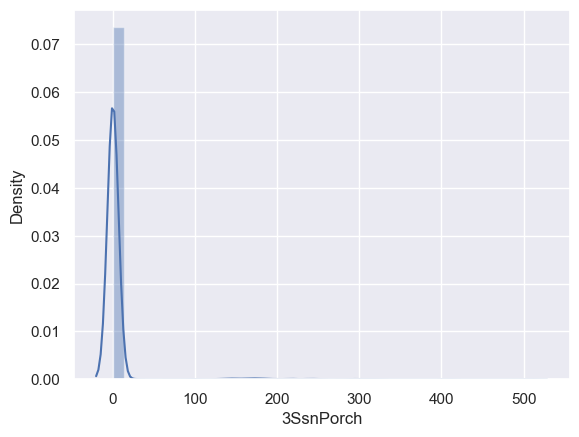

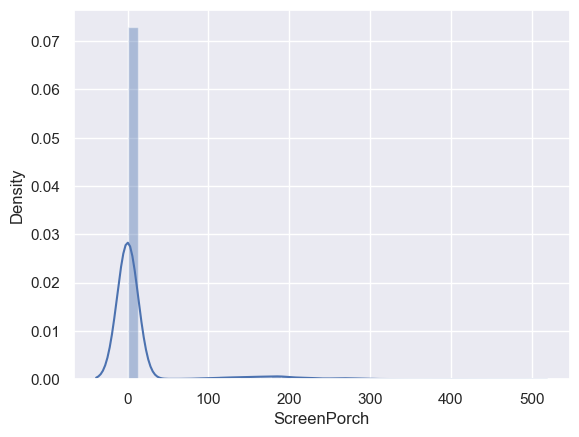

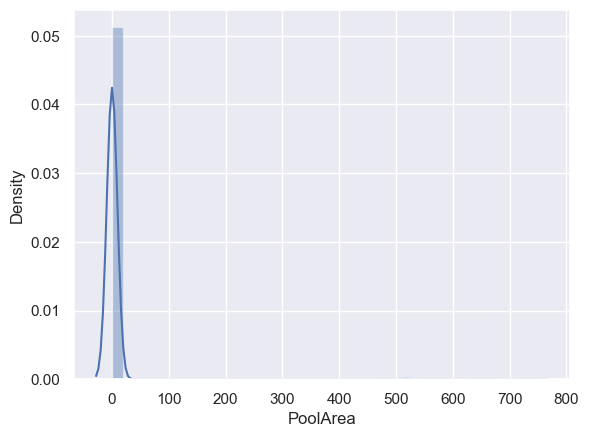

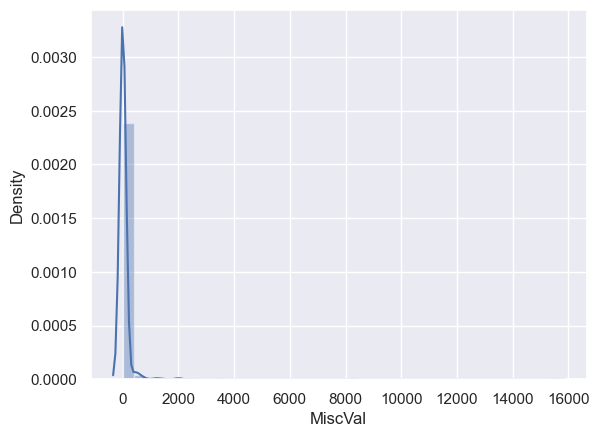

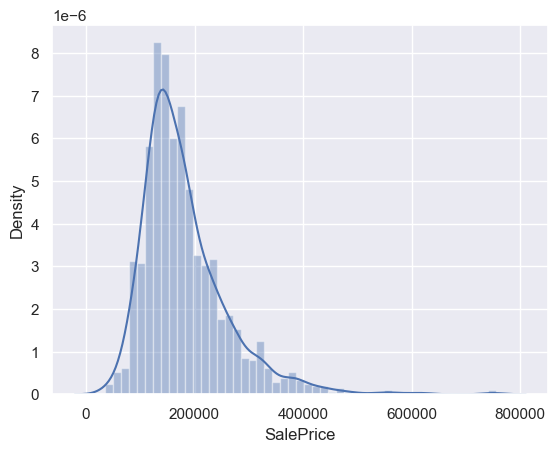

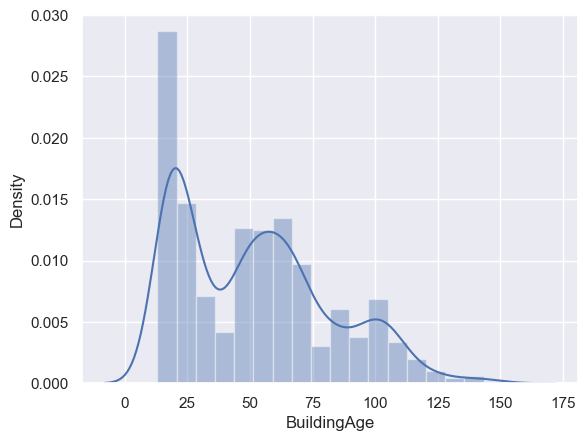

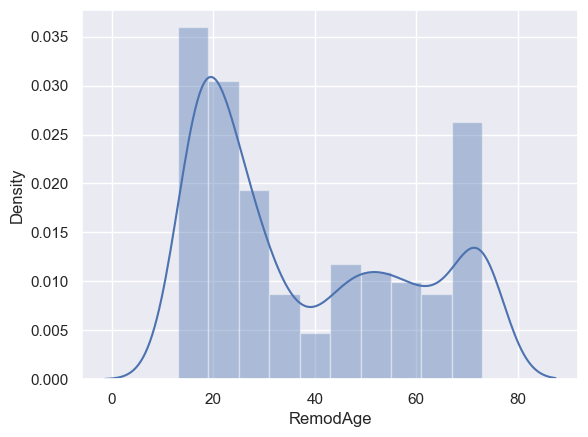

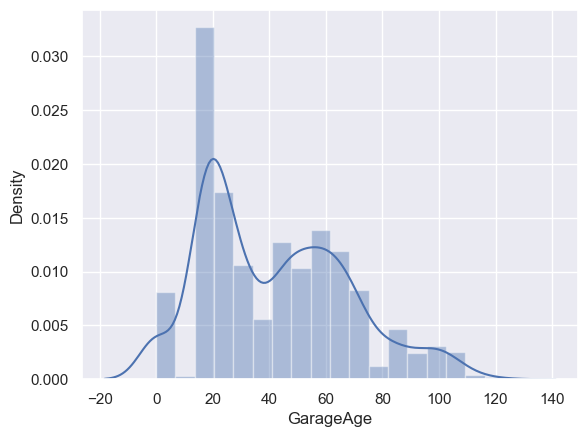

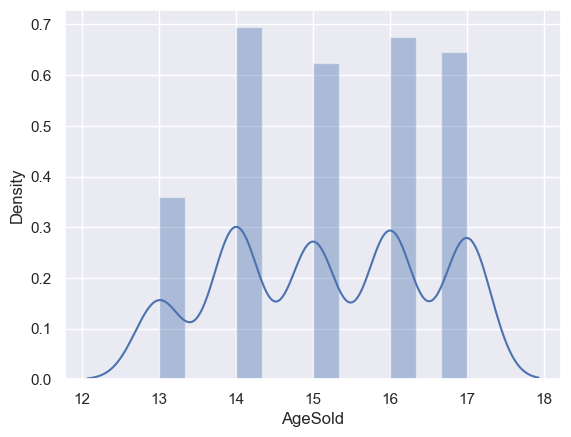

In [115]:
# Checking the distplot of the distribution
def distplots(col):
    sns.distplot(numeric_columns[col])
    plt.show()

for i in list(numeric_columns.columns)[0:]:
    distplots(i)

In [116]:
# The continuos data columns are skewed towards the right. 
# TotalBsmtSF,Garage Area,WoodDesk SF, OpenPorchSF,EnclosedPorchSF,3SsnPorch,
#ScreenPOrch,PoolArea, MiscVal and MasVnrArea columns have a lot of values coming under 0, 
# which means there are houses which do not have these provision provided.

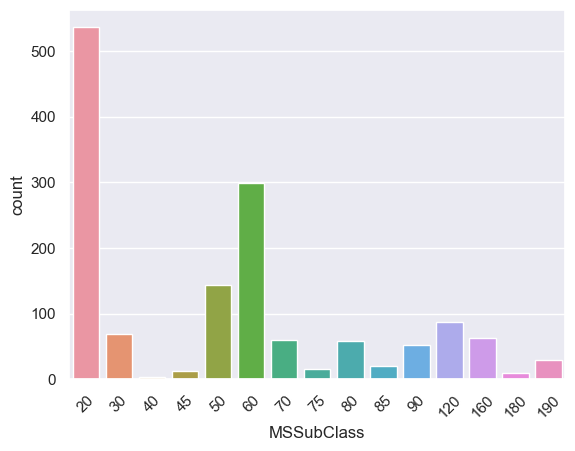

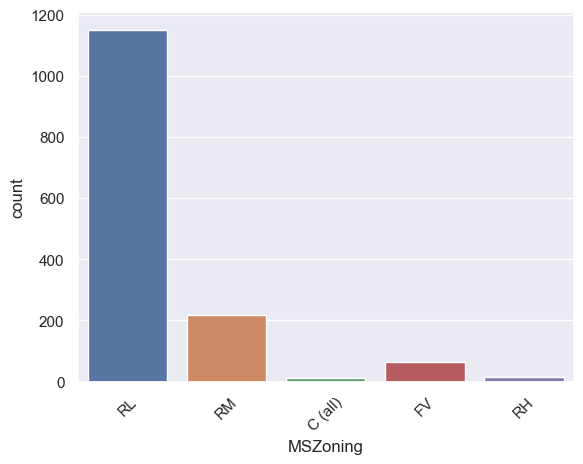

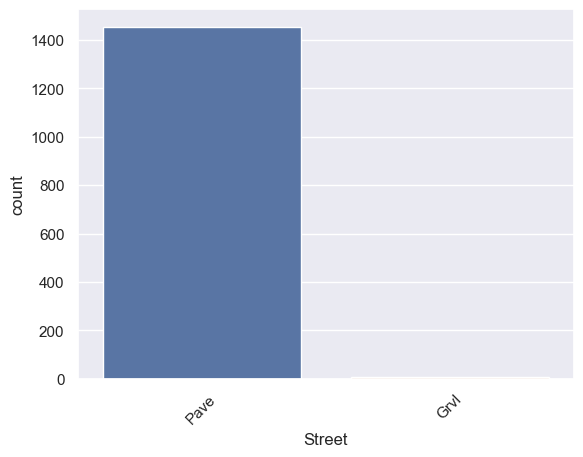

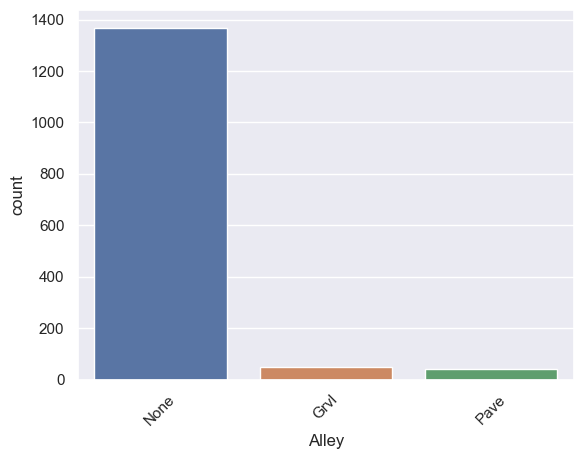

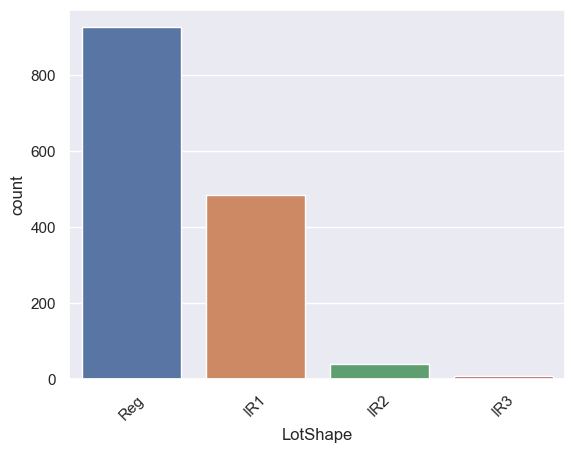

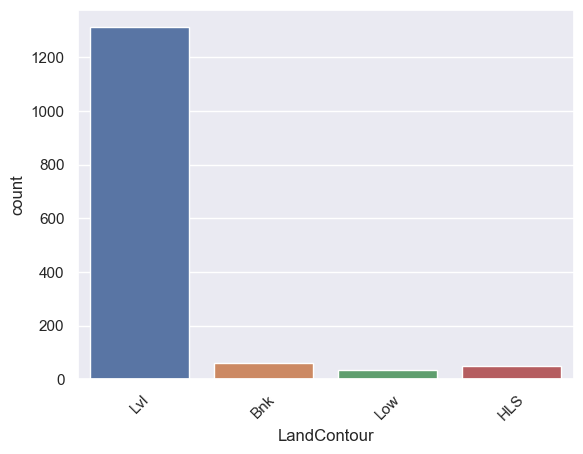

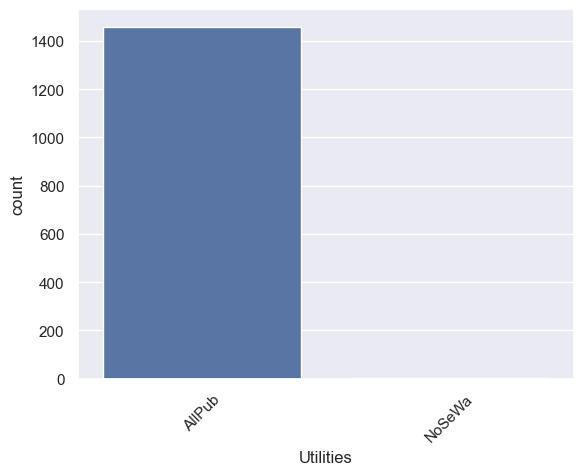

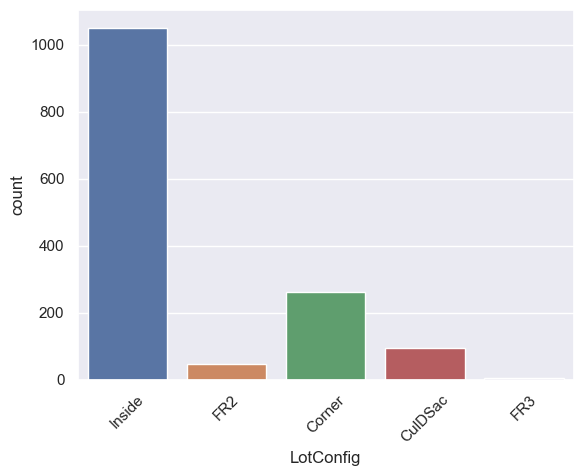

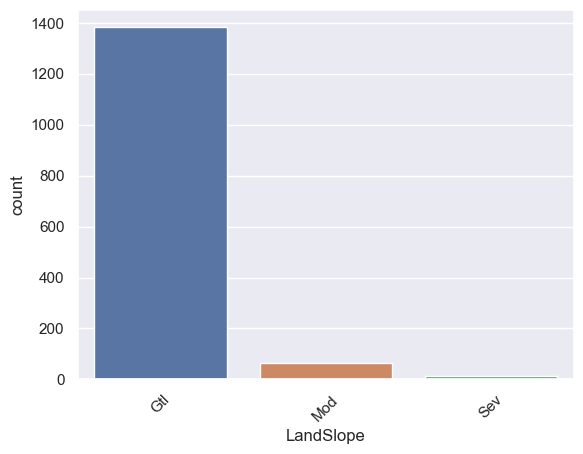

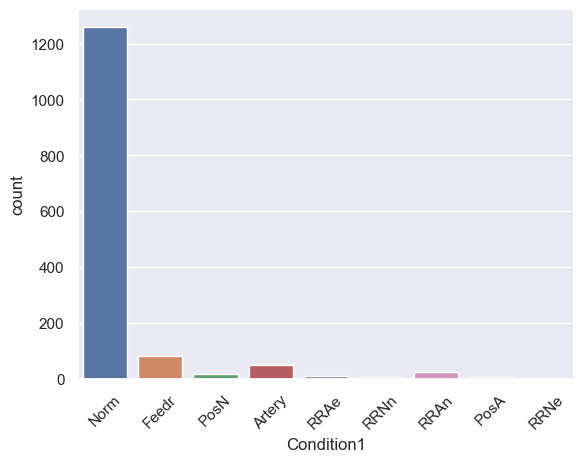

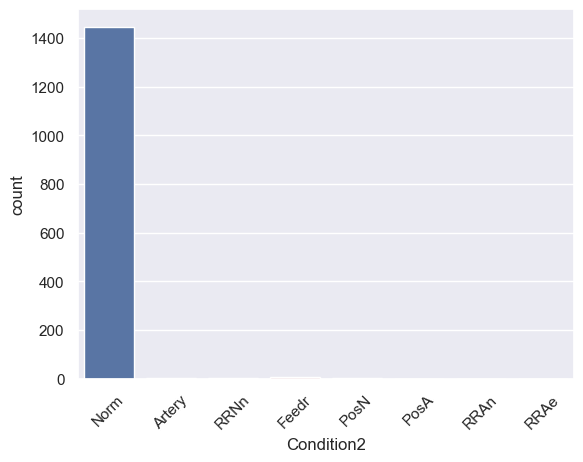

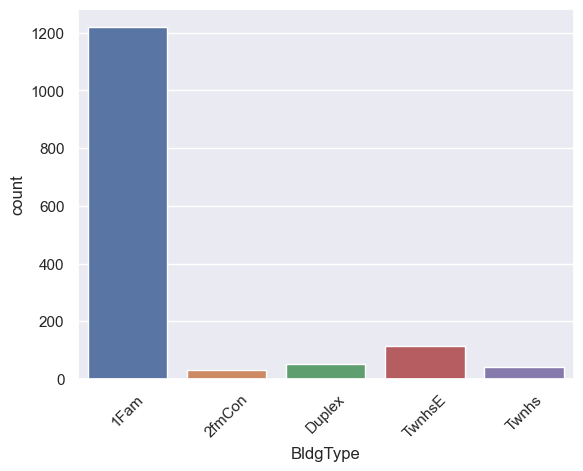

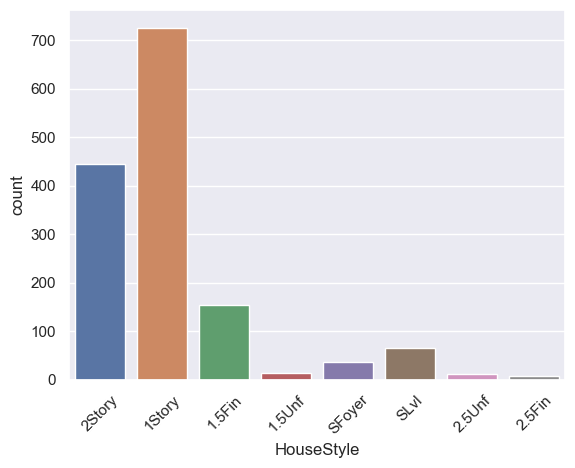

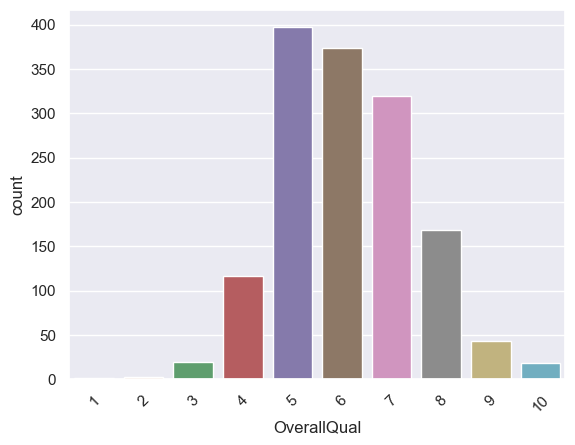

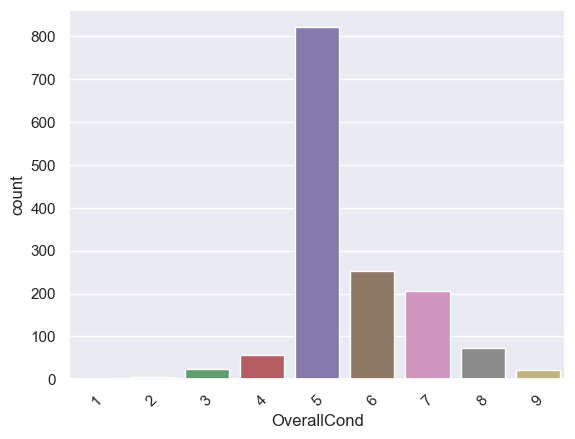

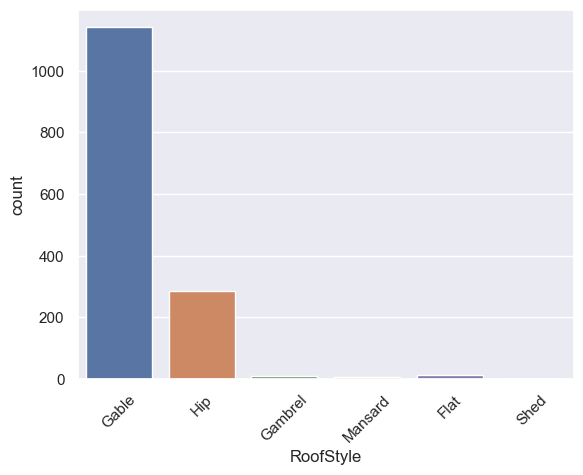

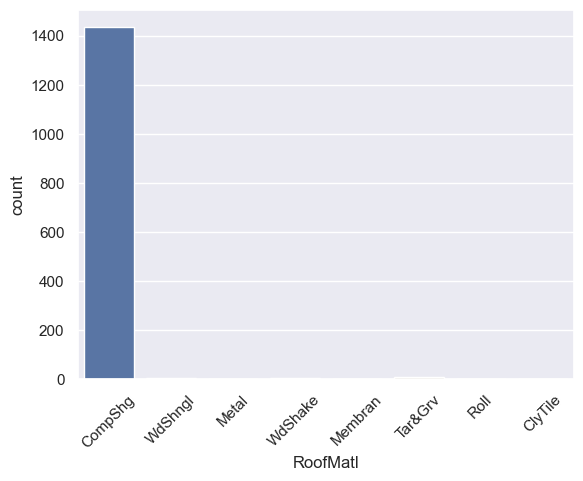

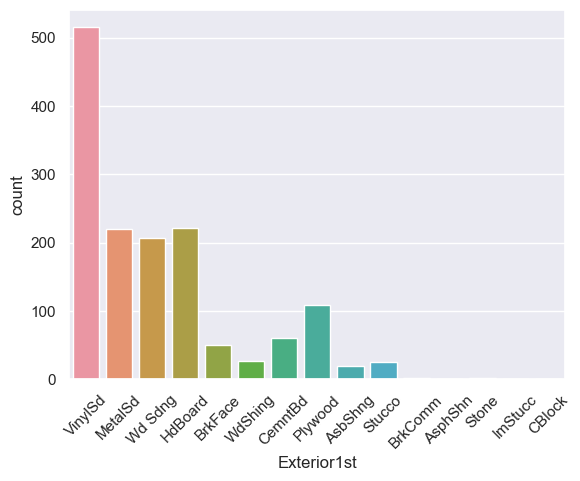

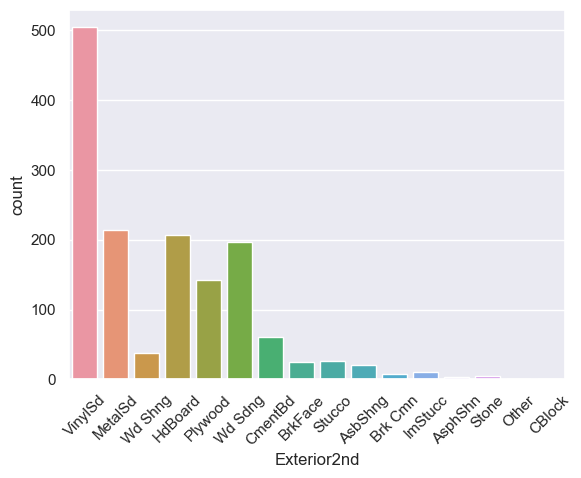

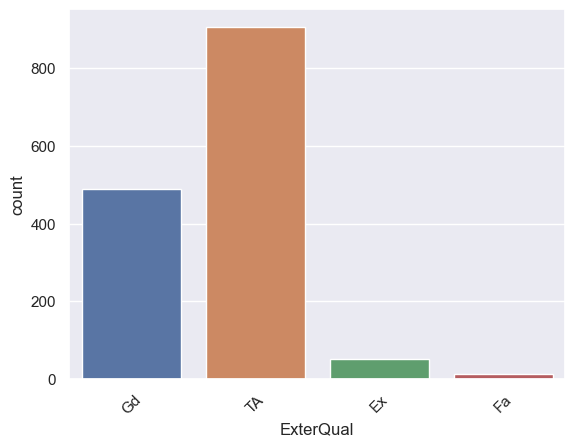

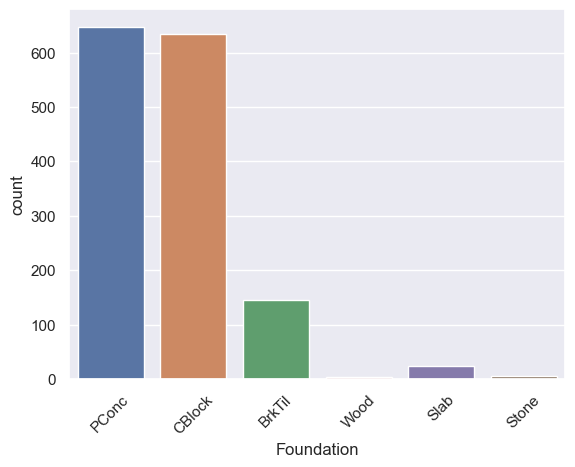

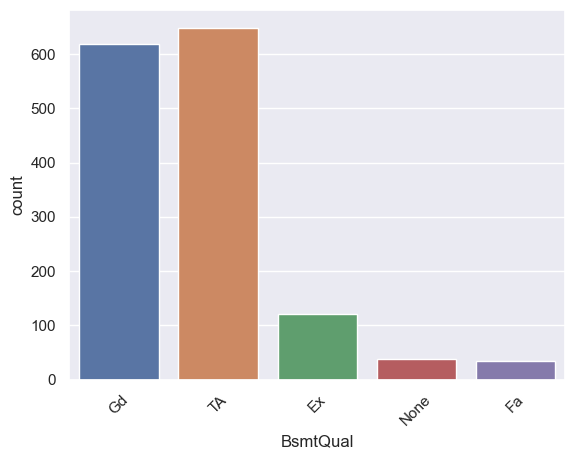

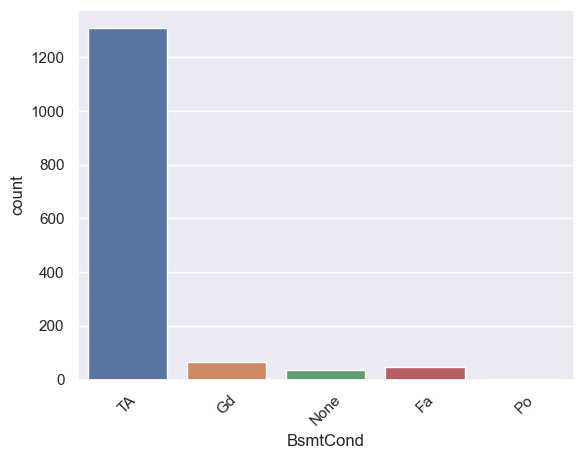

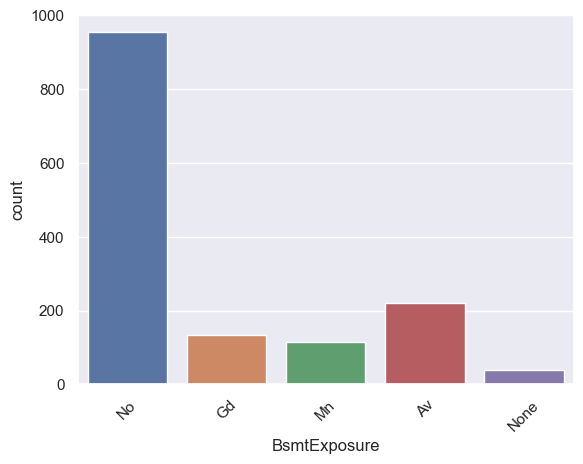

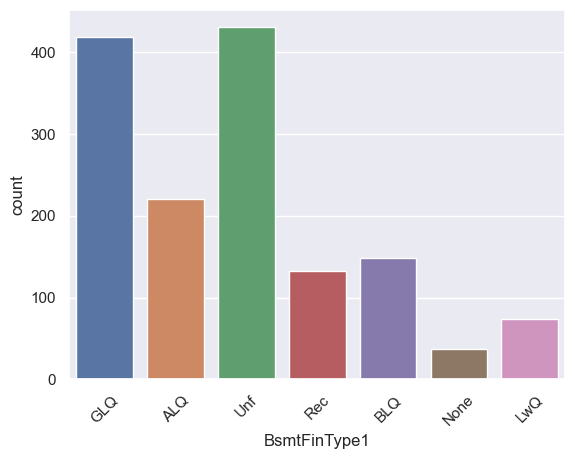

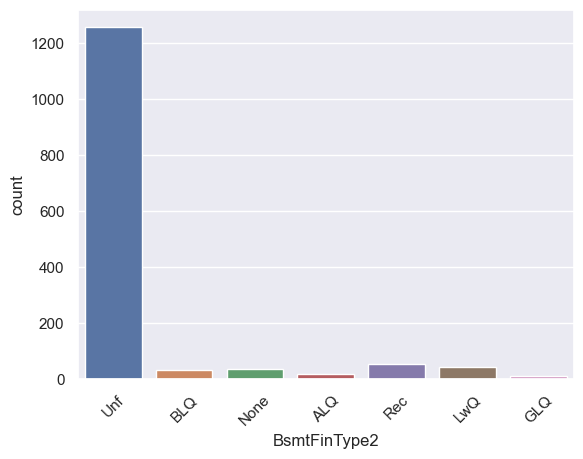

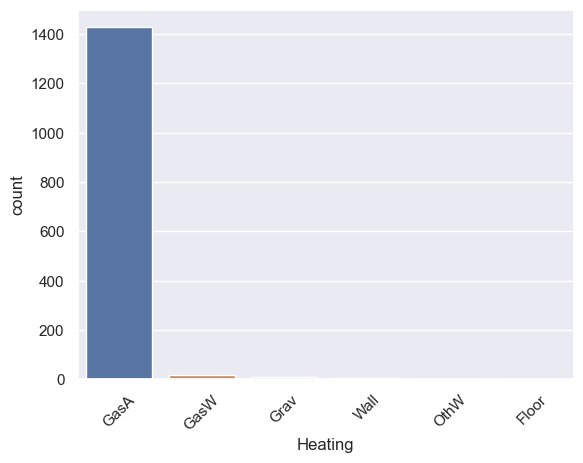

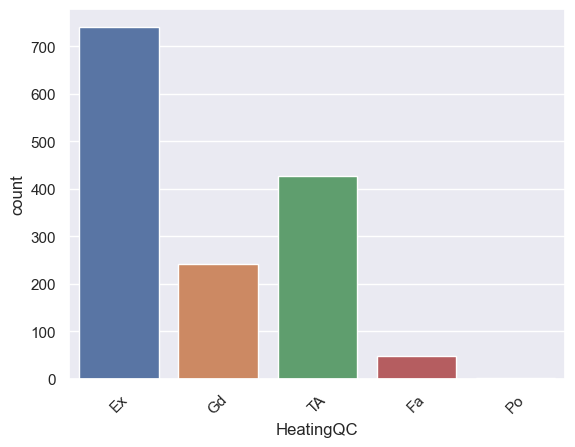

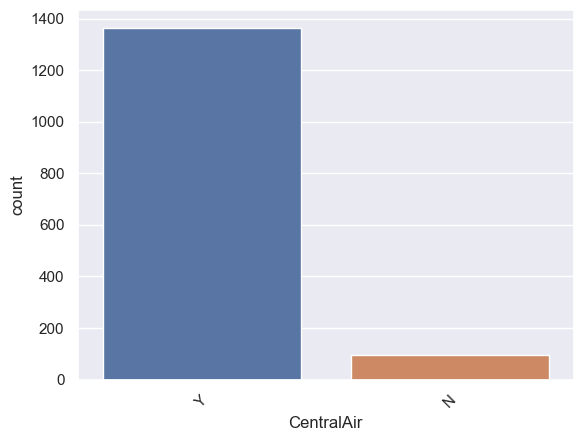

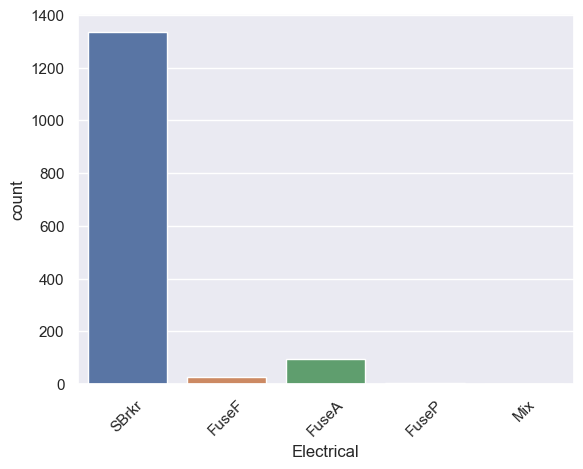

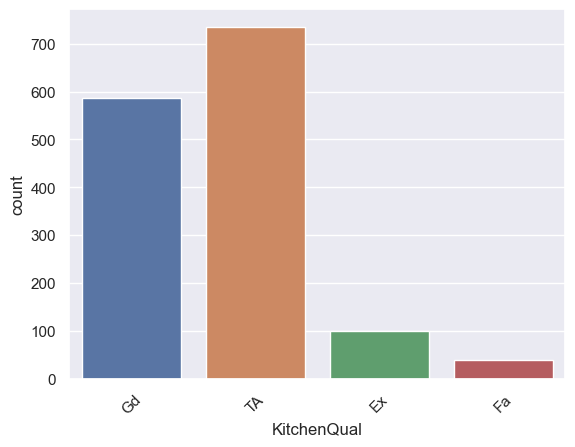

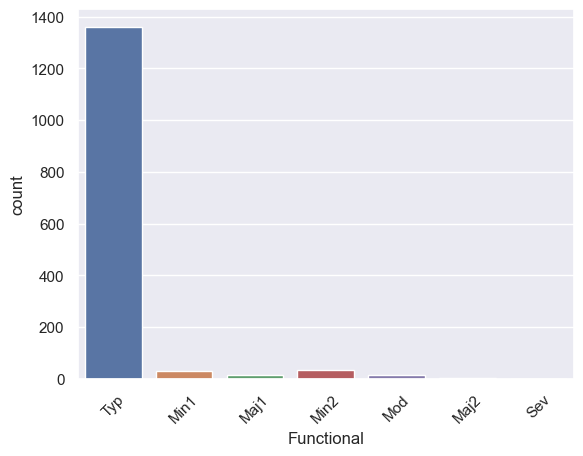

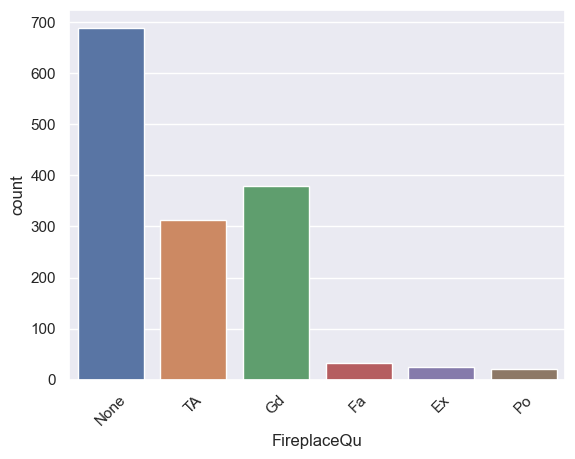

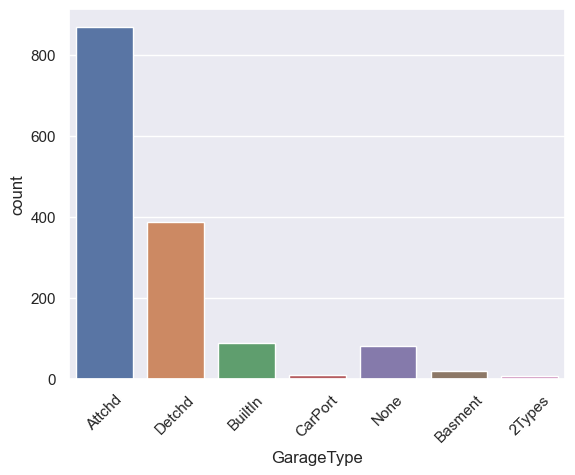

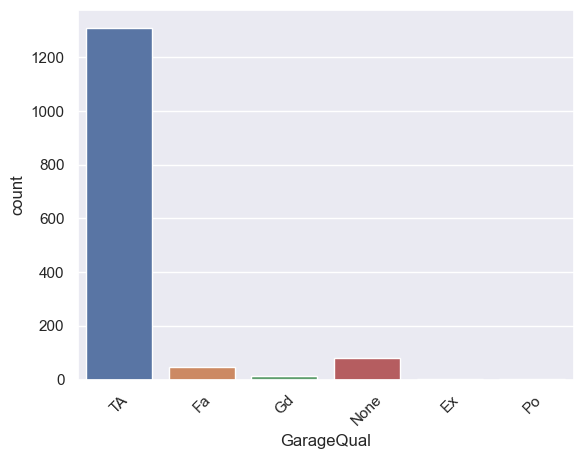

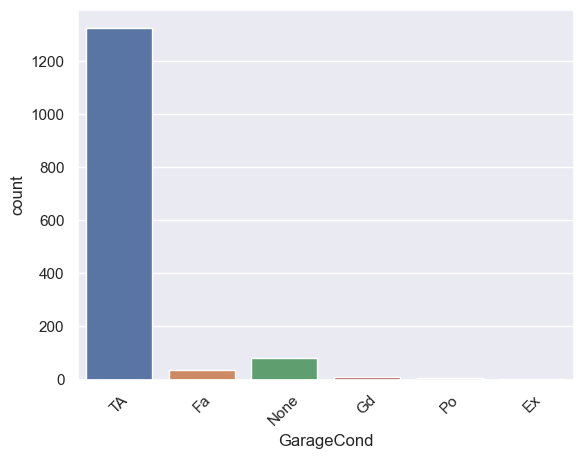

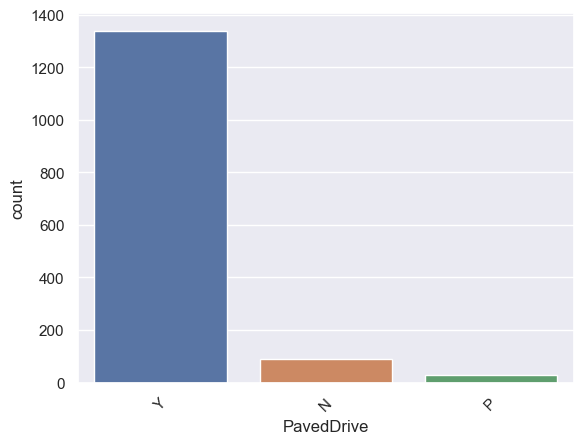

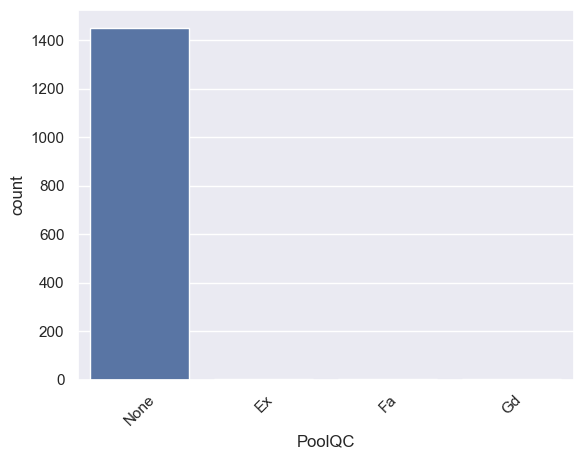

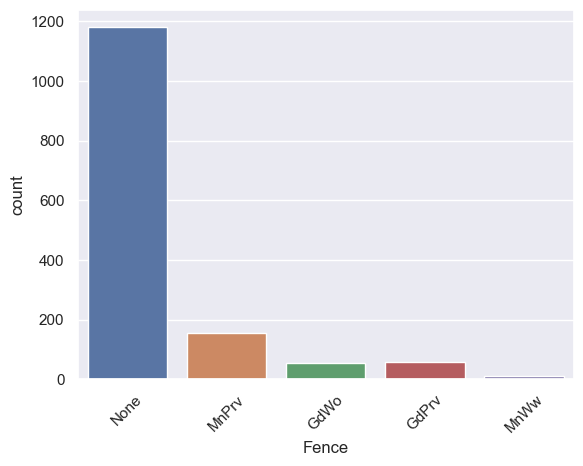

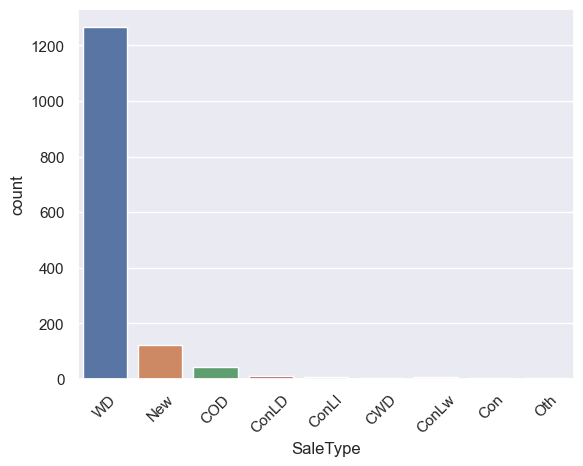

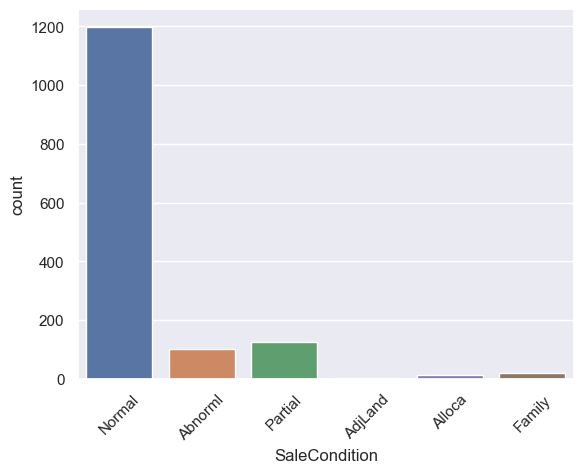

In [117]:
# Checking the countplot of the categorical data
def countplots(col):
    
    sns.countplot(categorical_columns[col])
    plt.xticks(rotation=45)
    plt.show()

for i in list(categorical_columns.columns)[0:]:
    countplots(i)

In [118]:
# The maximum dwelling count is   20 - 1-STORY 1946 & NEWER ALL STYLES
# The highest count is of Residential Low Density.
# most of the houses have Paved street access.
# 92% of the houses dont have any alley access.
# Most of The shape of the property is regular.
# Most of the houses have Flat Level of property.
# Most of the houses have All public utilities.
# THe max count of the property are situated near North Ames as a neighborhood.
# Most of the houses habe VinylSd as the exterior
# Max houses dont habe any Veneer type.
# Most of the houses with basement and exterior material have average condition 
# Most of the houses have gas heating and central air conditining avalable.
# The sale type is Warraty Deed - Conventional Sale type.

In [119]:
# Checking the correlation 
df_corr = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(df_corr,annot=True,cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

GrLivArea is the most correlated with Sale Price. Next is GarageCars and Garage Area that are correlated with Sale Price.
There are variables like LotArea, BsmtFullBath,HalfBAth,BedroomAboveGrd,KitchenAboveGrd,EnclosedPorch,3SsnPorch,ScreenPorch,
PoolArea,MiscVal,BuildingAge,RemodAge,GArageAge,Agesold are all very less correlated with Price.

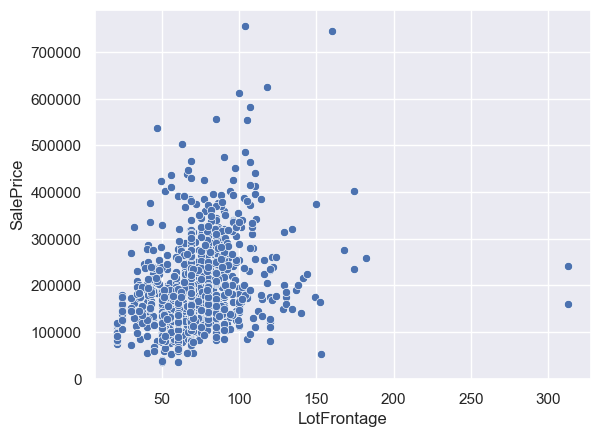

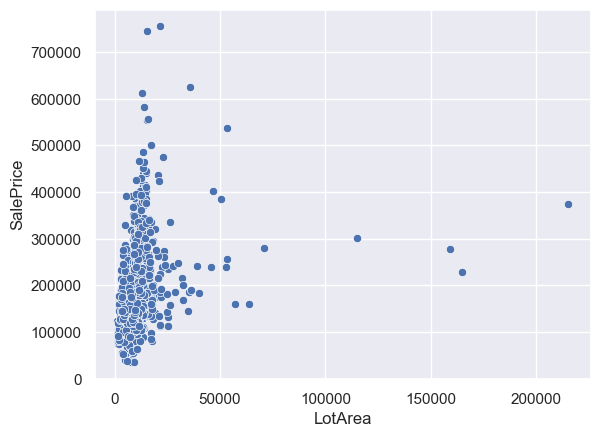

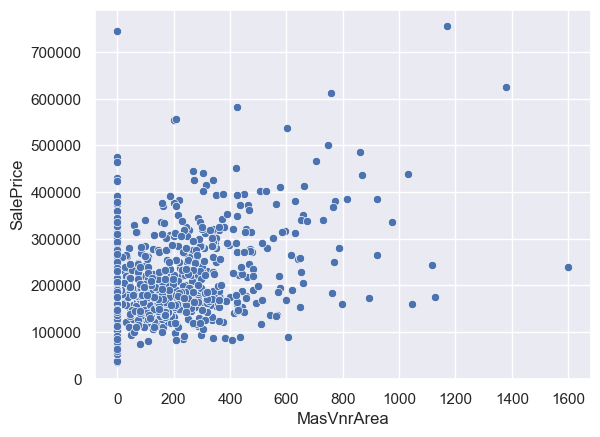

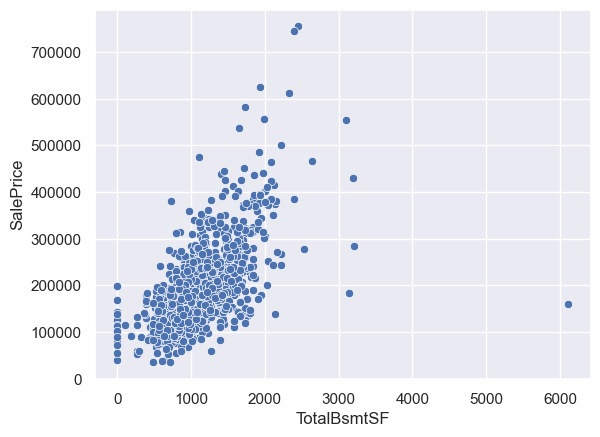

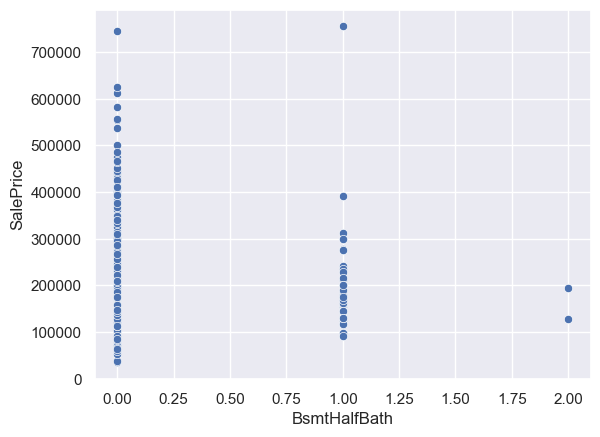

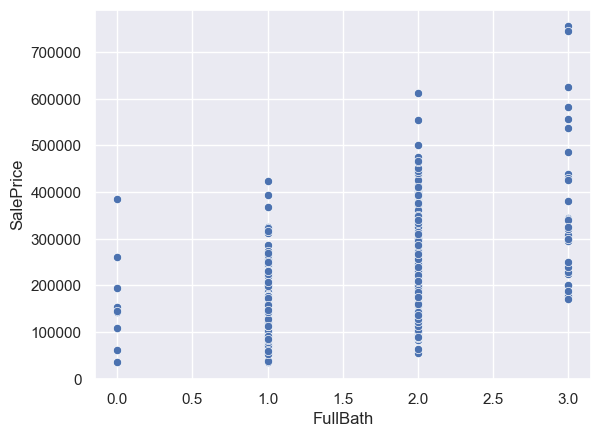

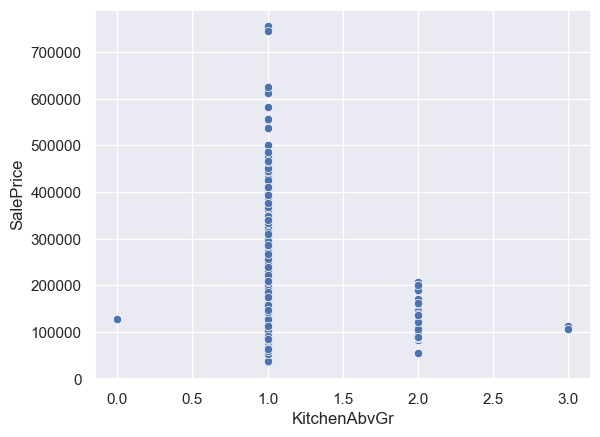

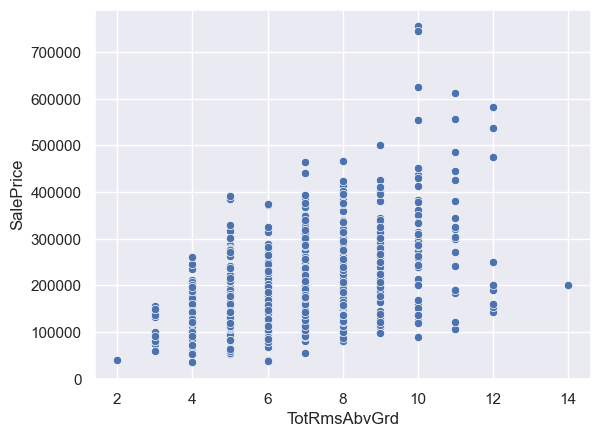

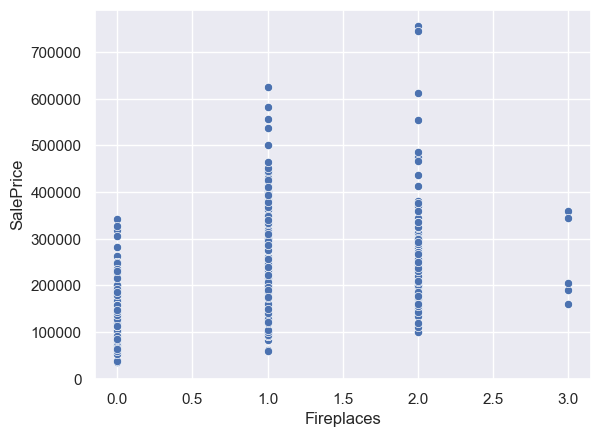

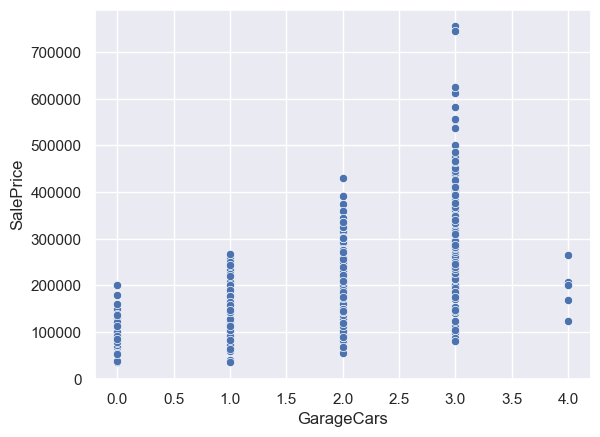

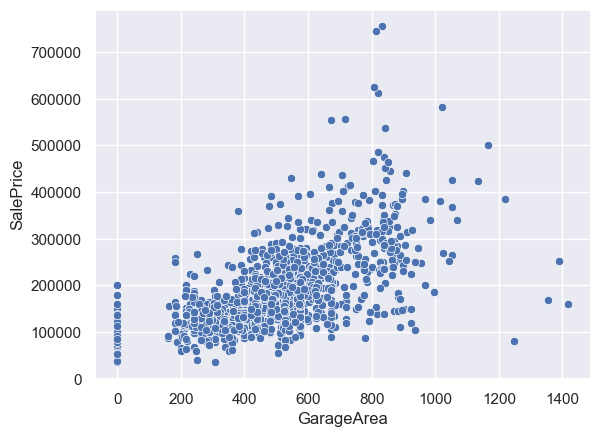

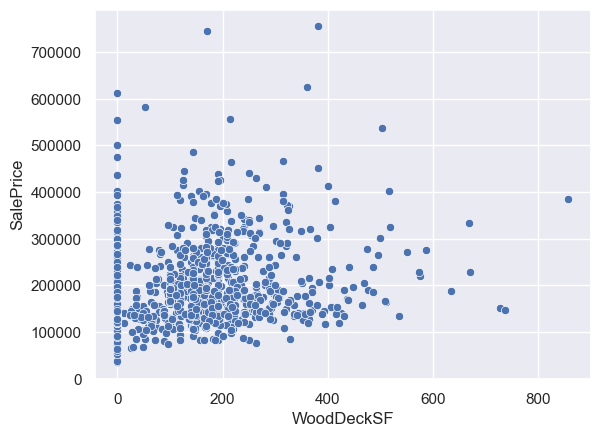

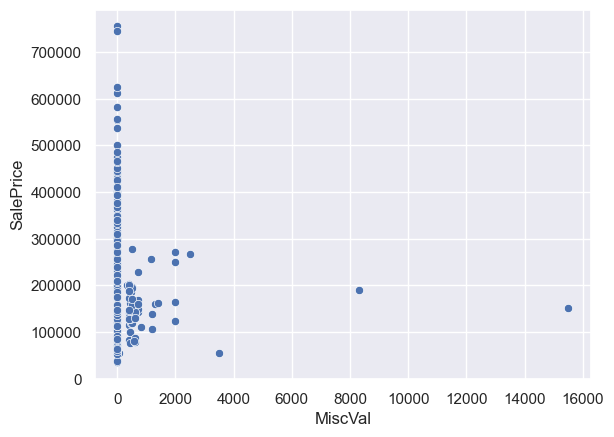

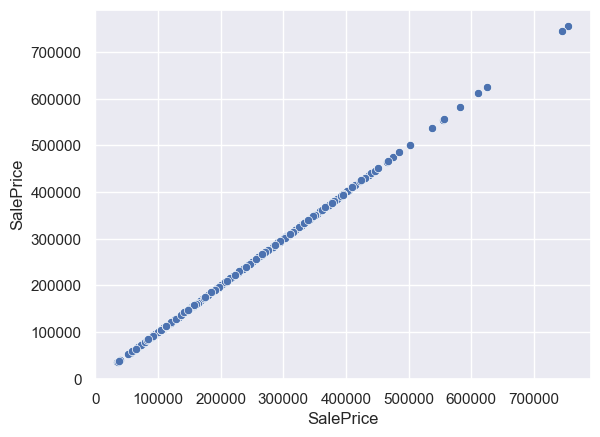

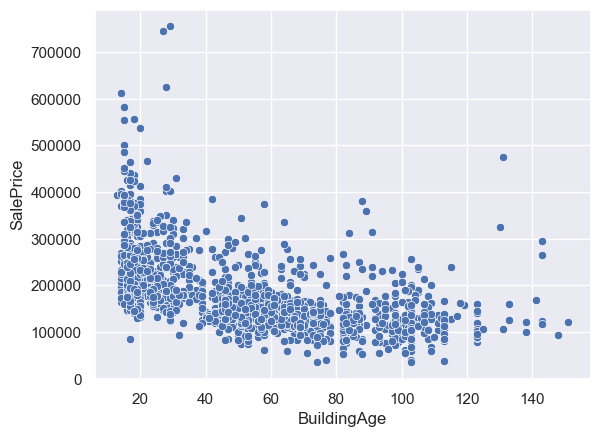

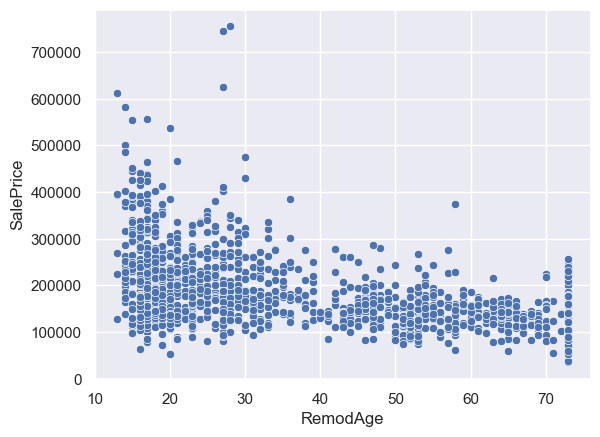

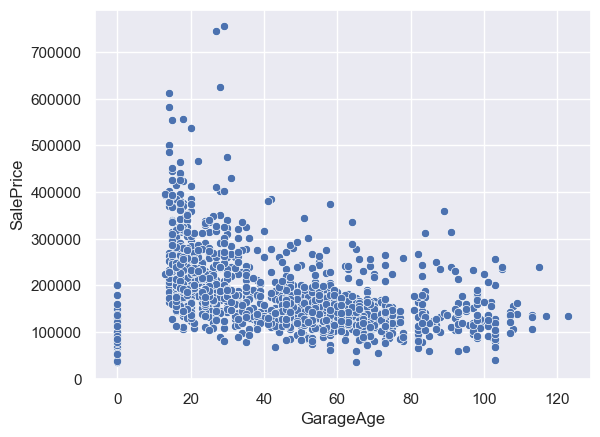

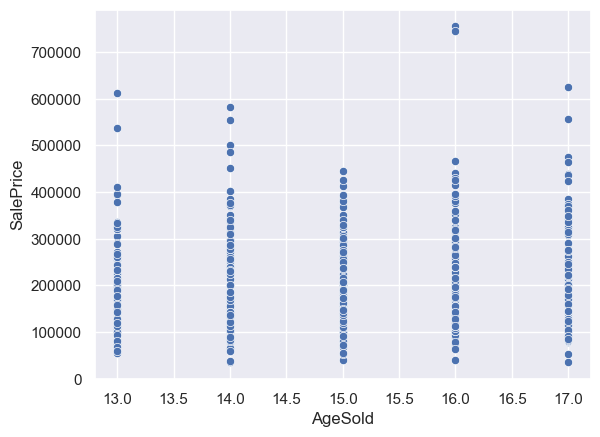

In [120]:
# Cheking the relationship between Numeric features and  Dep Variable 'Sale Price'

def scatterplots(col):
    sns.scatterplot(x = numeric_columns[col],y = df['SalePrice'])
    plt.show()

for i in list(numeric_columns.columns)[0:]:
    scatterplots(i)

Continous variables such as LotFrontage, MasVnrArea, TotalBsmtSF, GrLivArea,GarageAge,WoodDeckSF,OpenPorchSF have a positive relationship with Price.
3SSnPorch and Pool Area have no relationship with Price.
Building Age, Remod Age, Garage Age all have a negative relationship with Price.


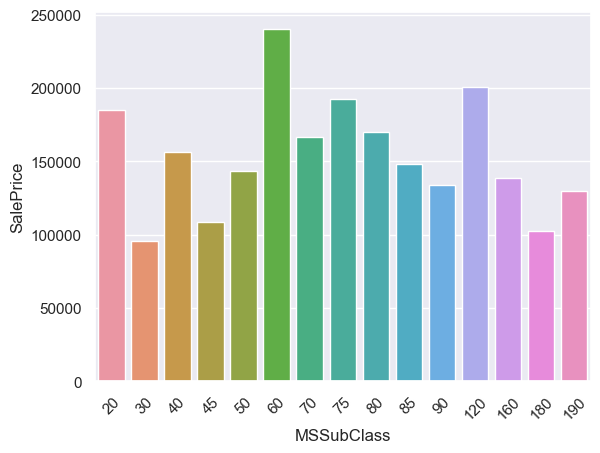

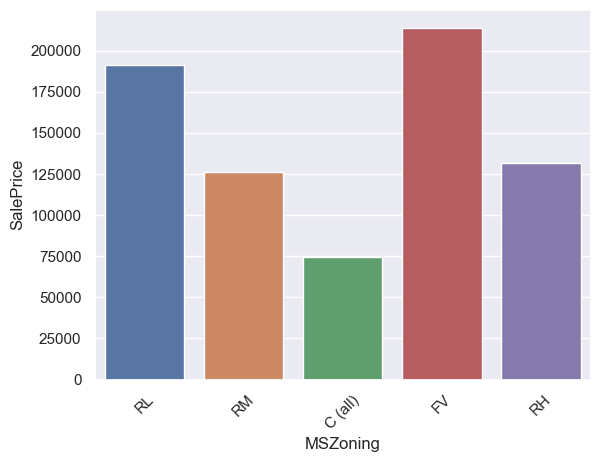

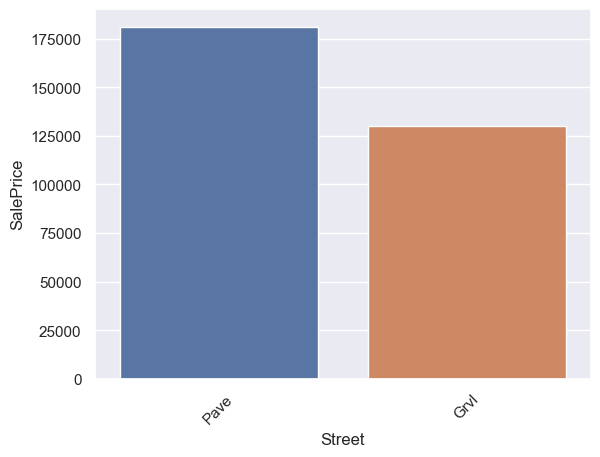

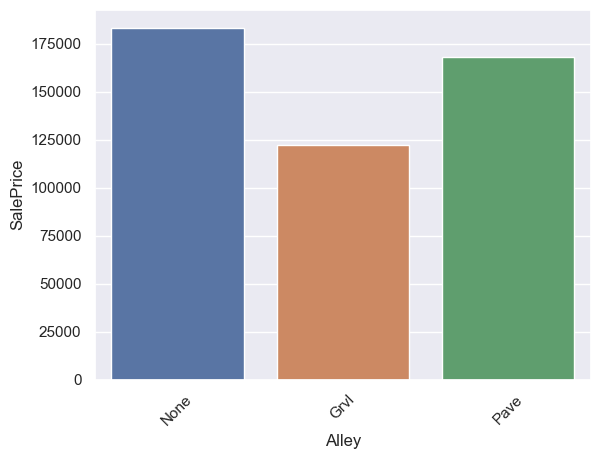

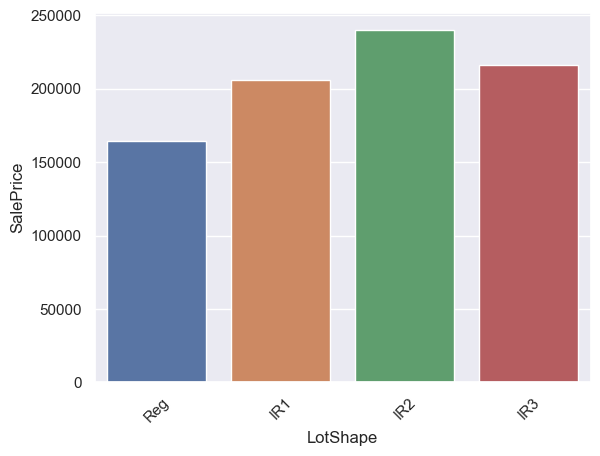

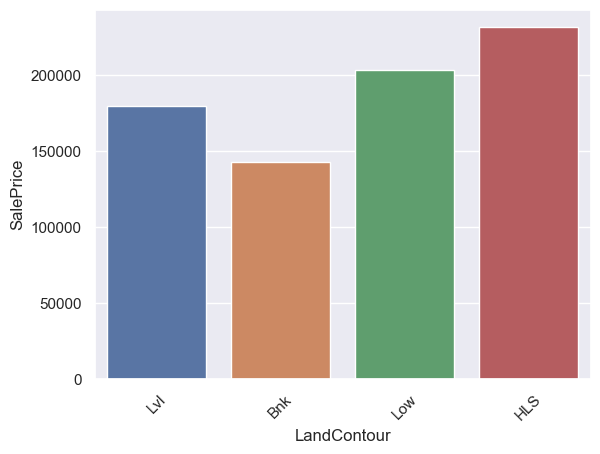

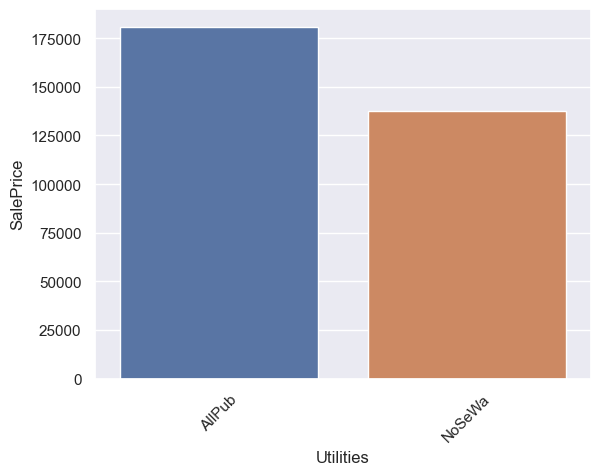

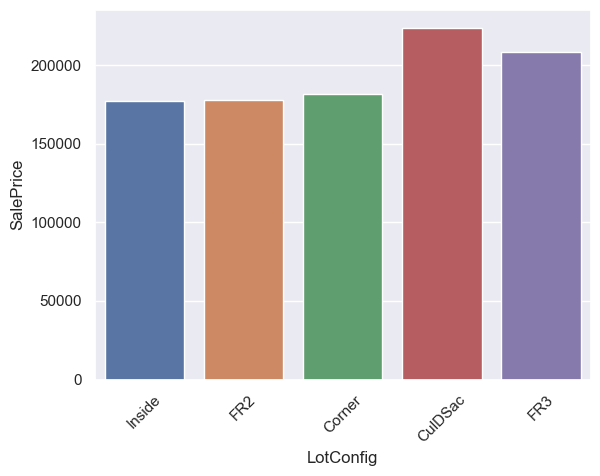

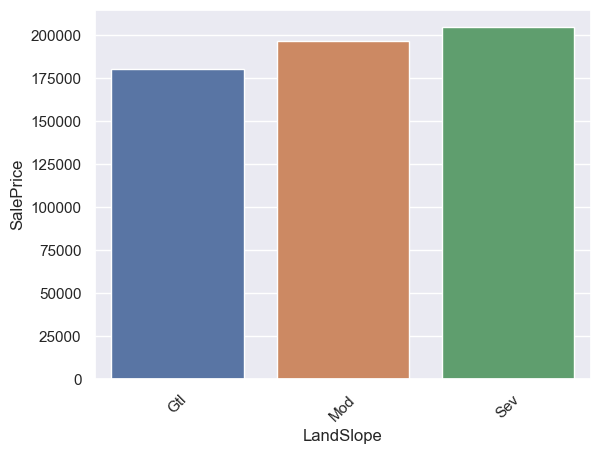

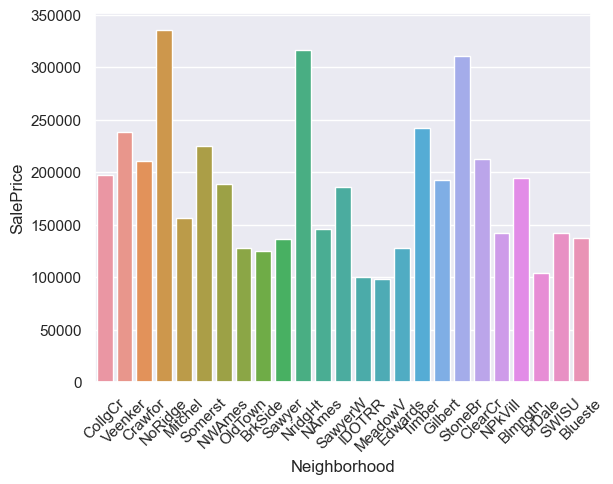

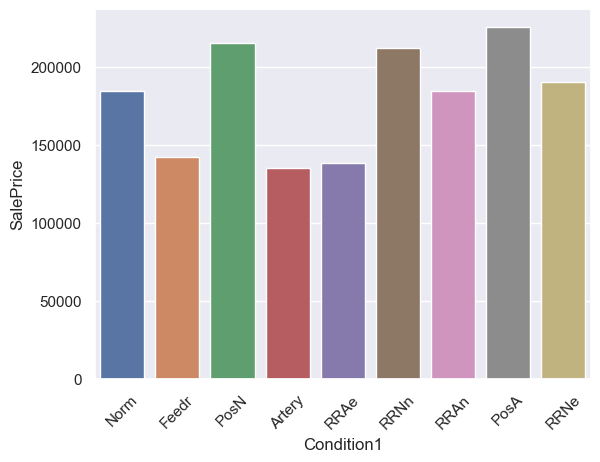

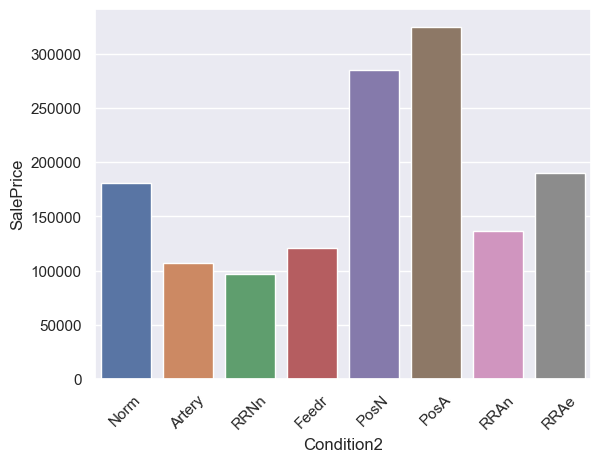

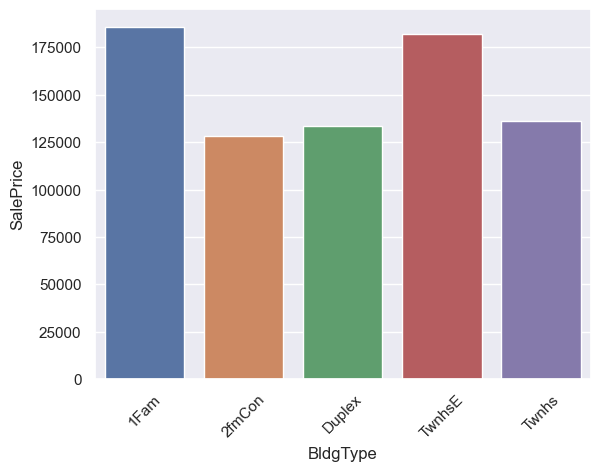

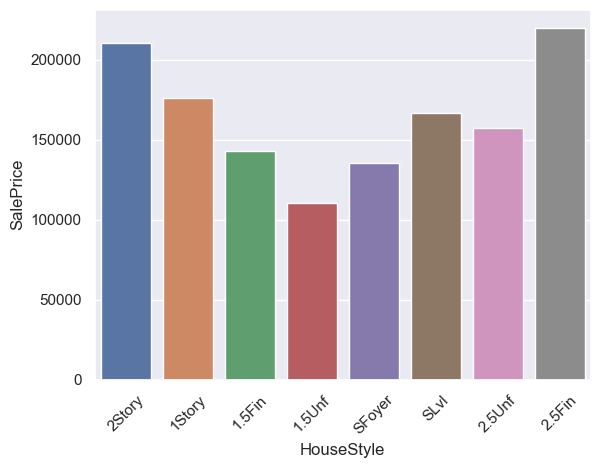

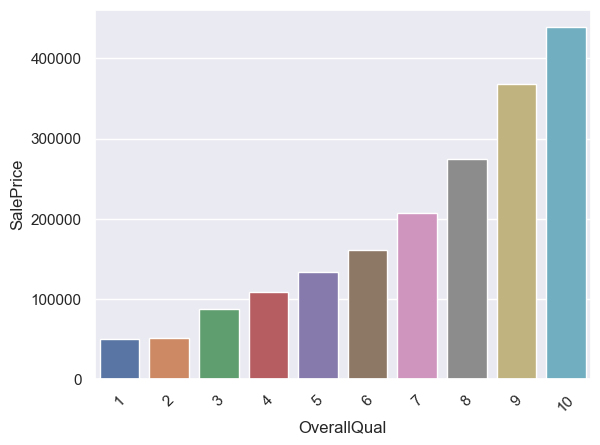

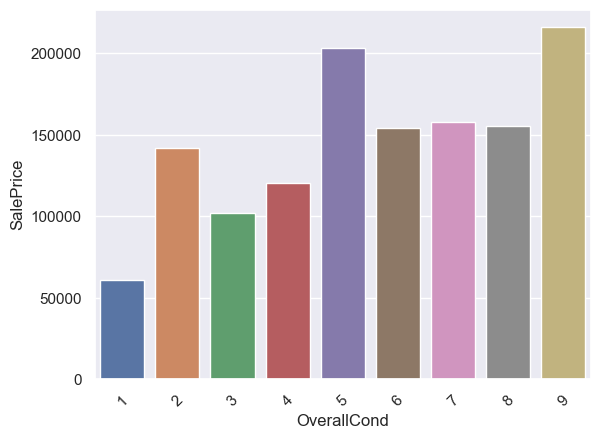

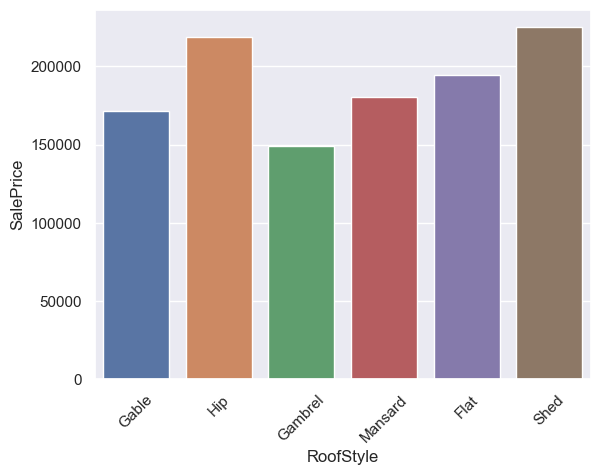

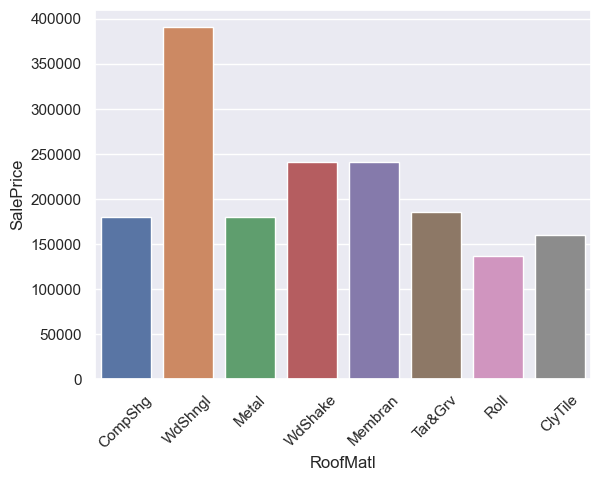

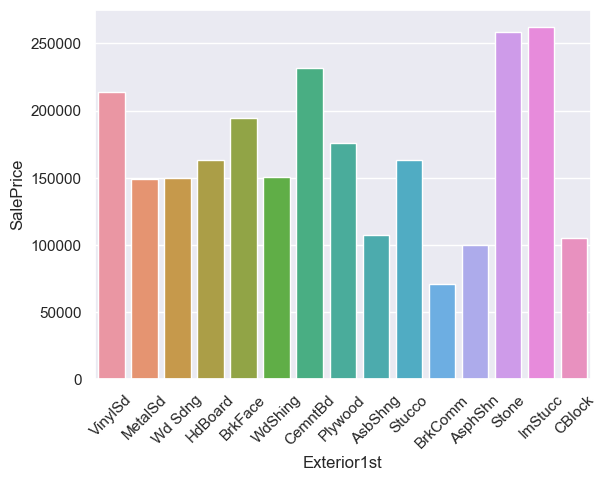

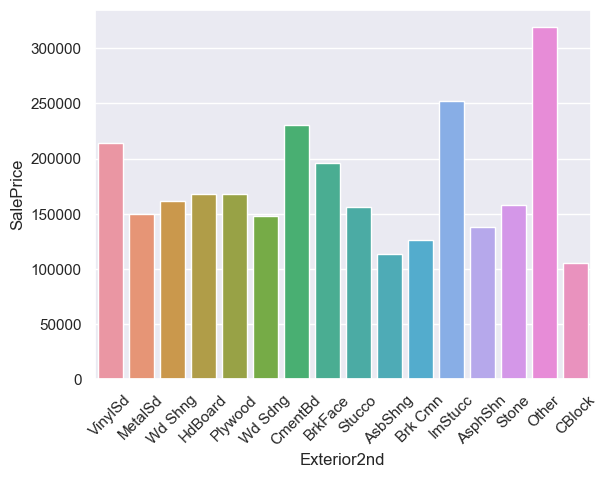

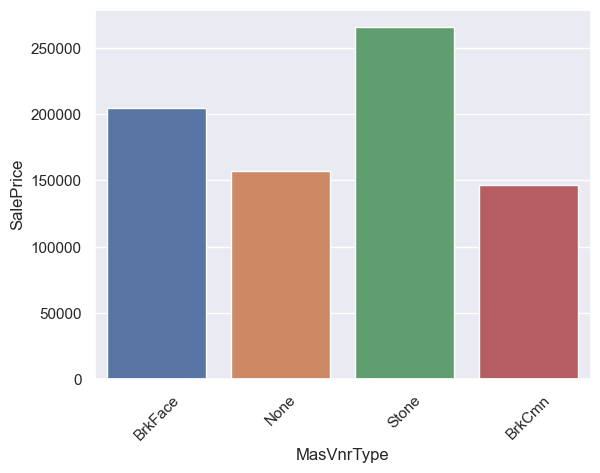

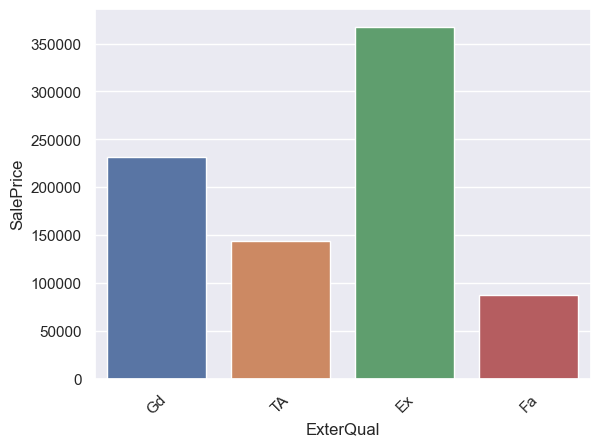

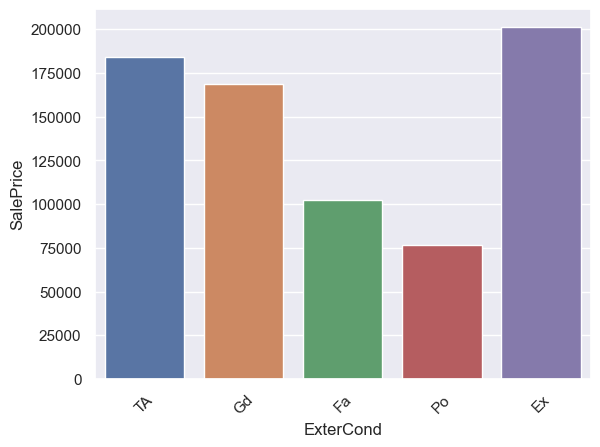

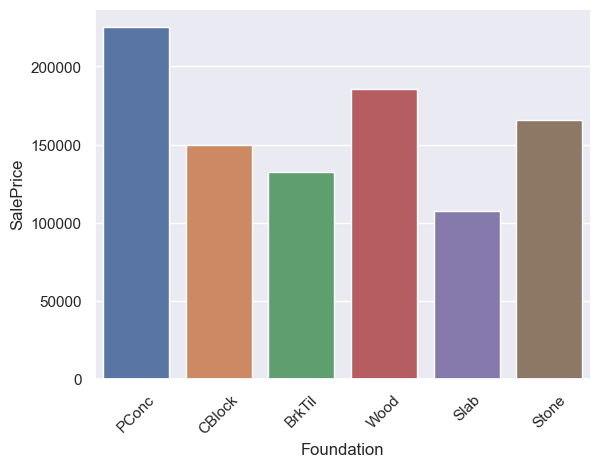

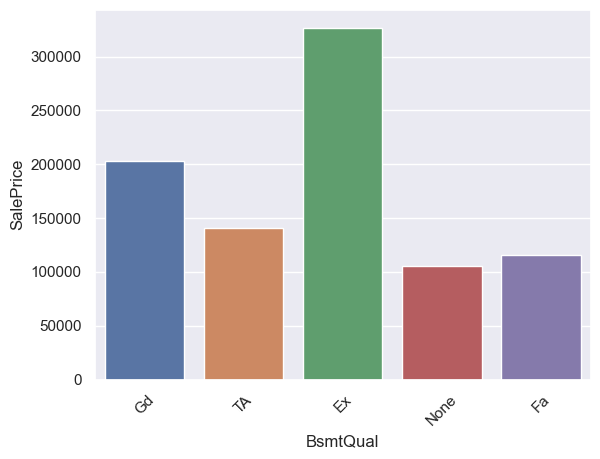

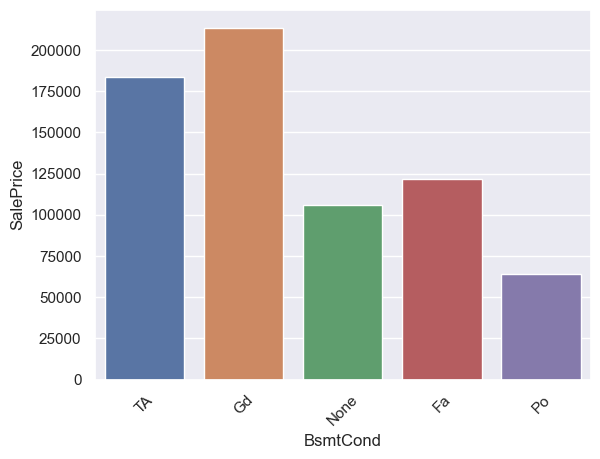

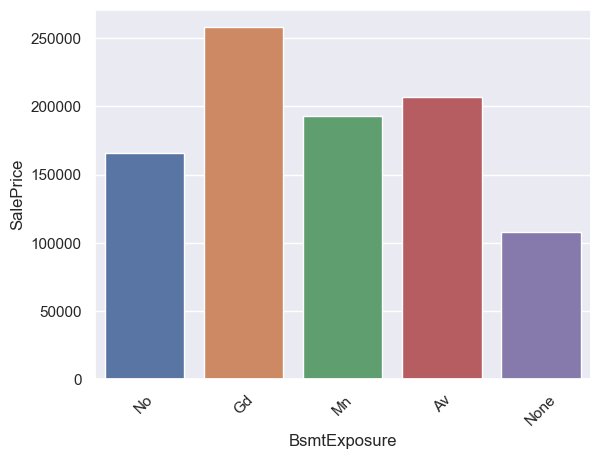

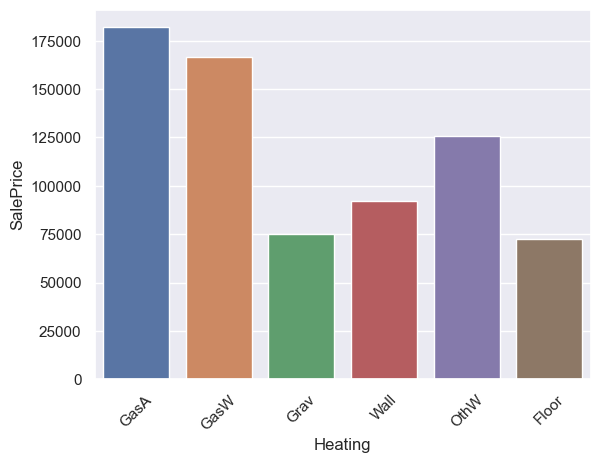

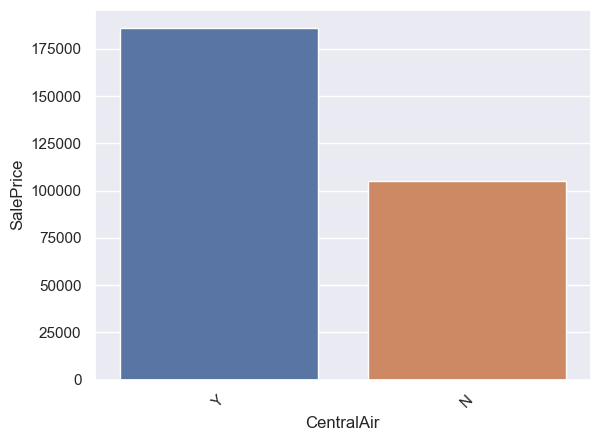

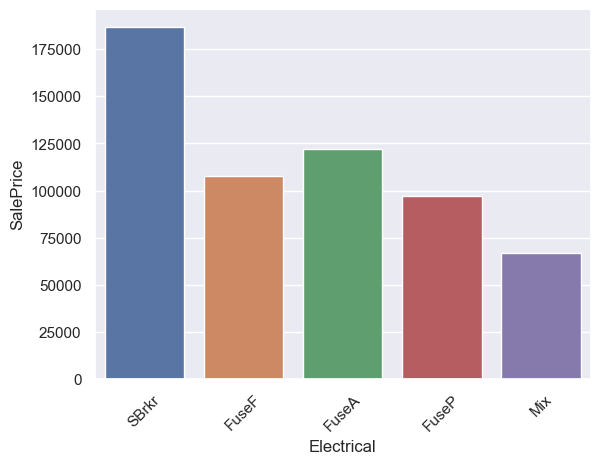

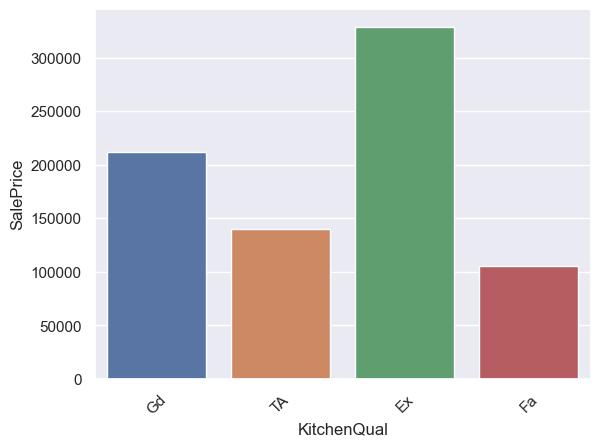

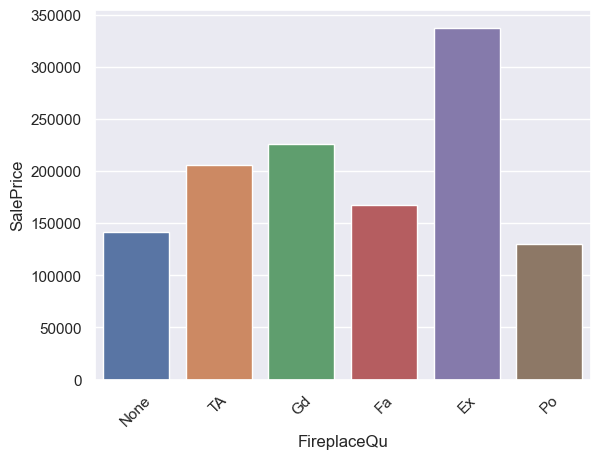

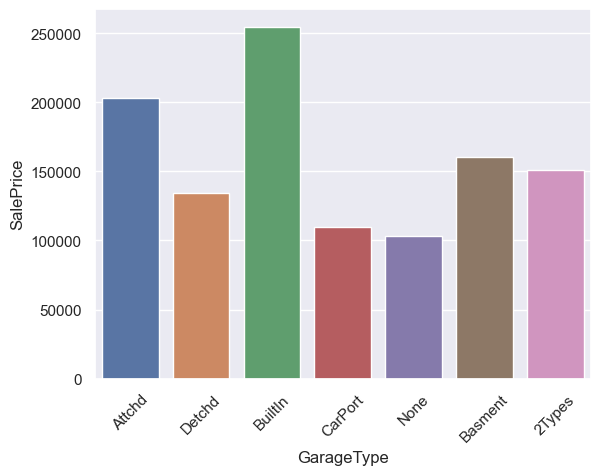

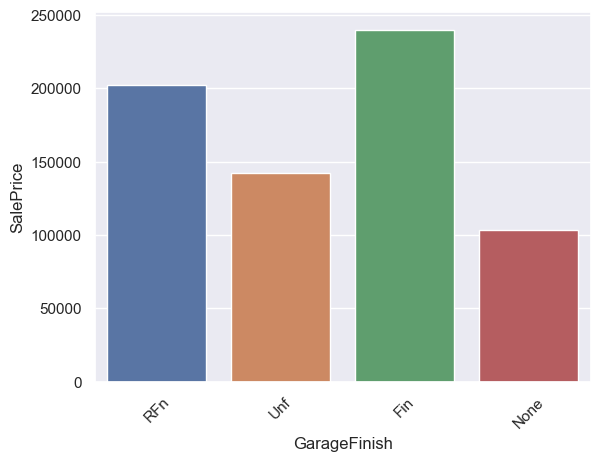

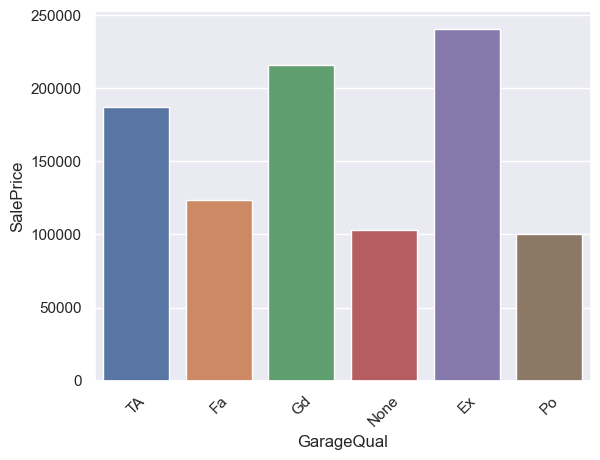

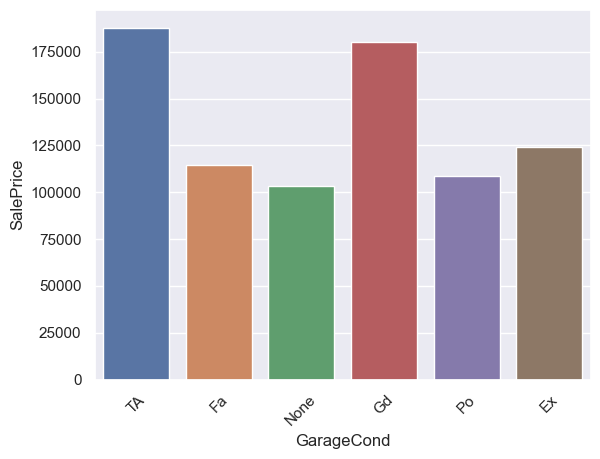

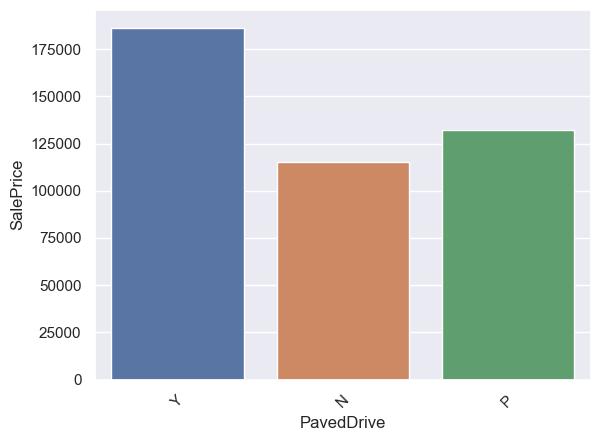

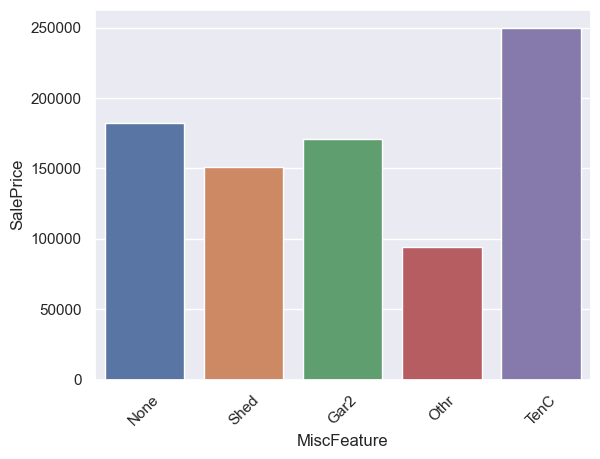

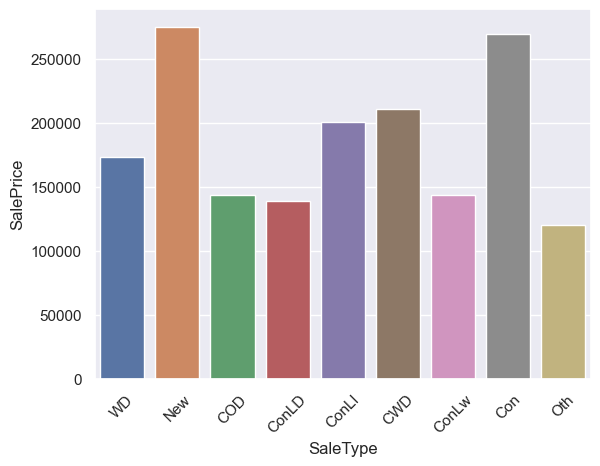

In [121]:
def barplots(col):
   
    sns.barplot(x = categorical_columns[col], y = df['SalePrice'],ci=None)
    plt.xticks(rotation=45)
    plt.show()

for i in list(categorical_columns.columns)[0:]:
    barplots(i)

Houses with highest price have a Paved Street.
Most of the houses have no Alley Acceess.
Houses with highest price All Public Utilities available
Houses with highest price are in theCrawford Neighborhood.
The houses which are highest priced are 1Fam type houses.
All the houses which are priced high have good quality amenities.

# 4. Check for outliers in the dataset

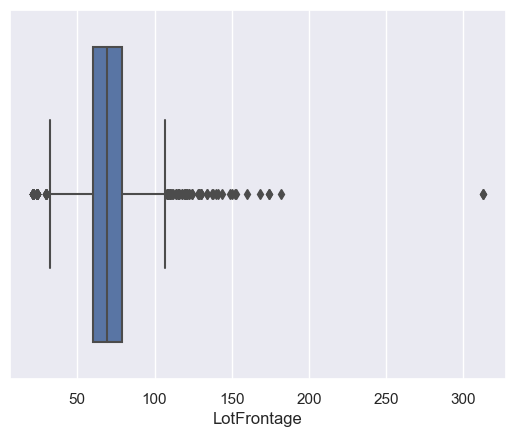

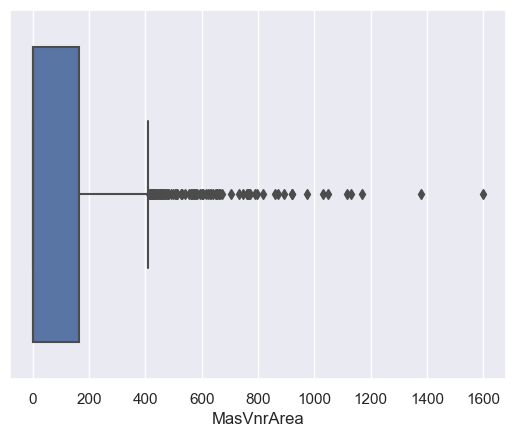

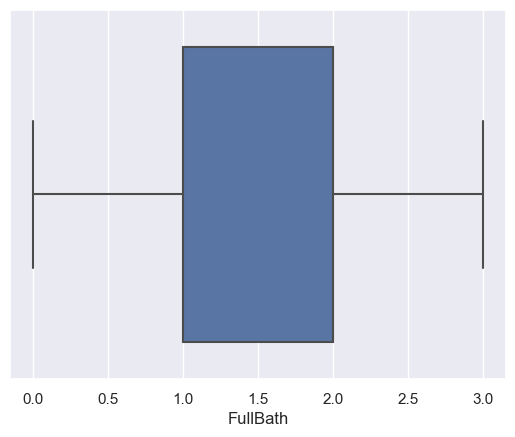

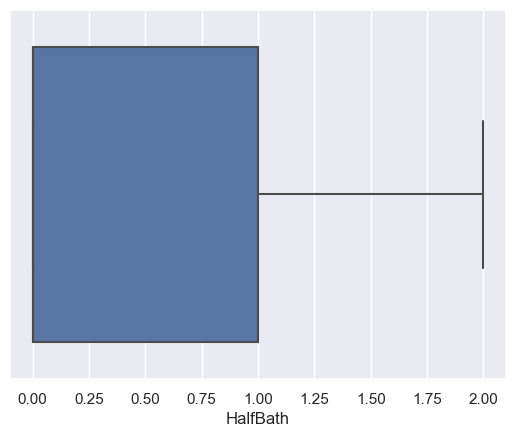

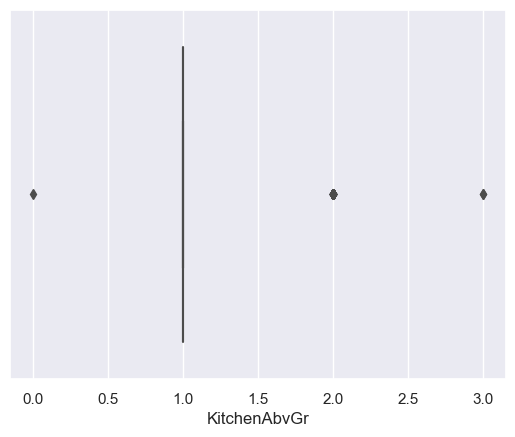

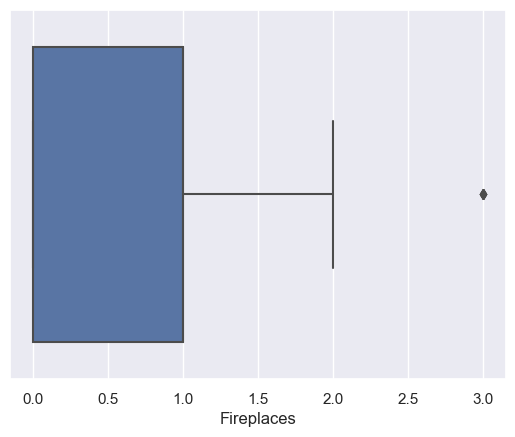

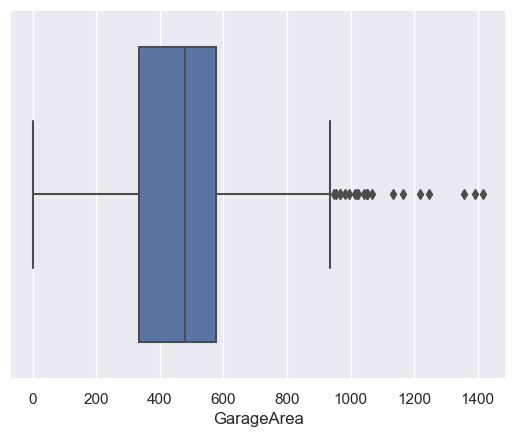

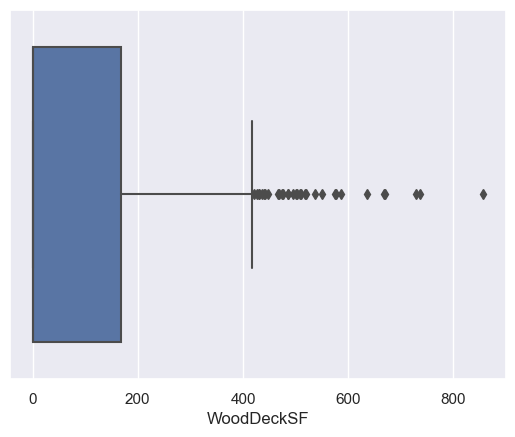

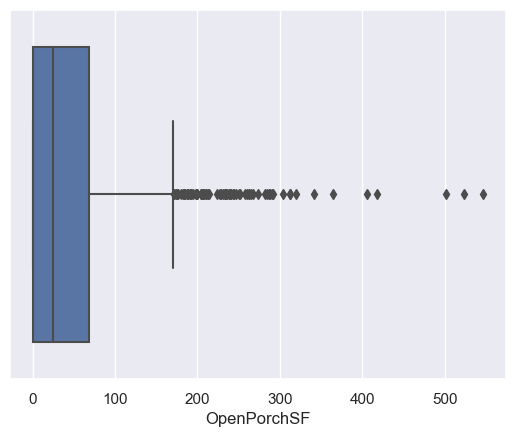

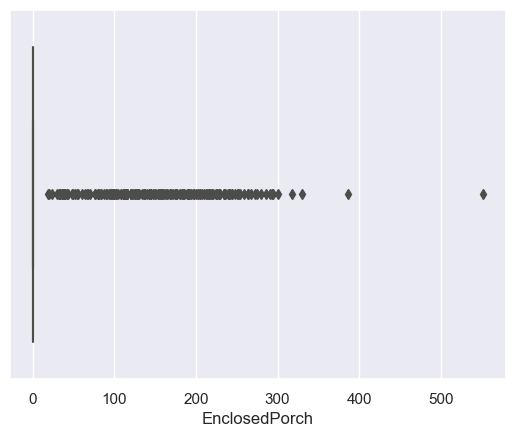

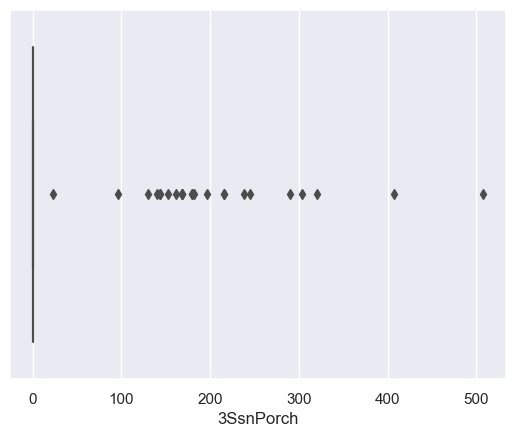

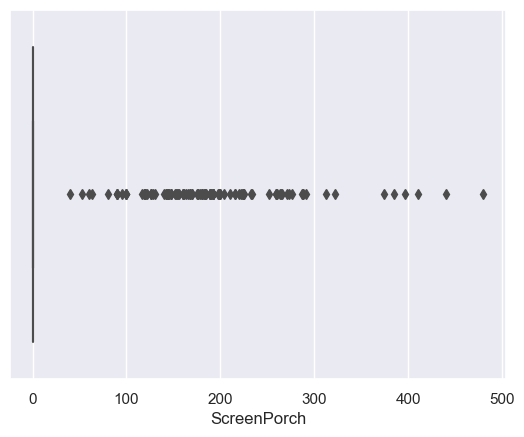

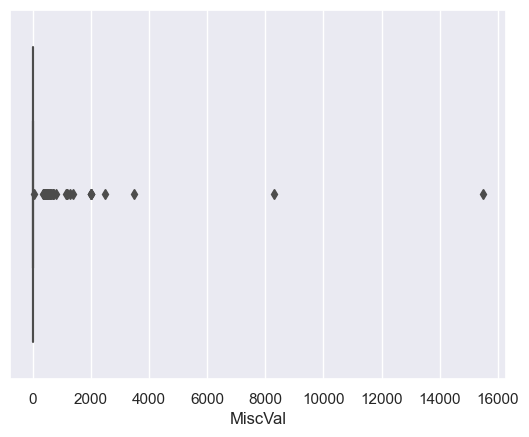

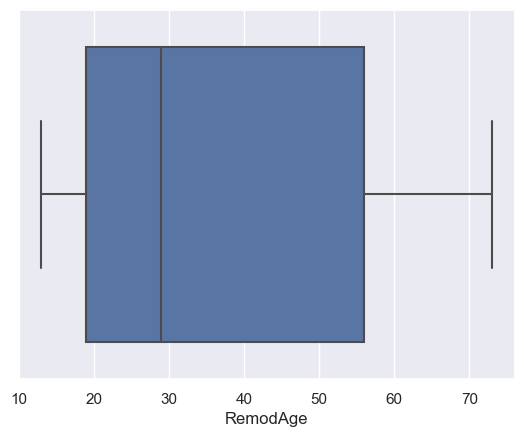

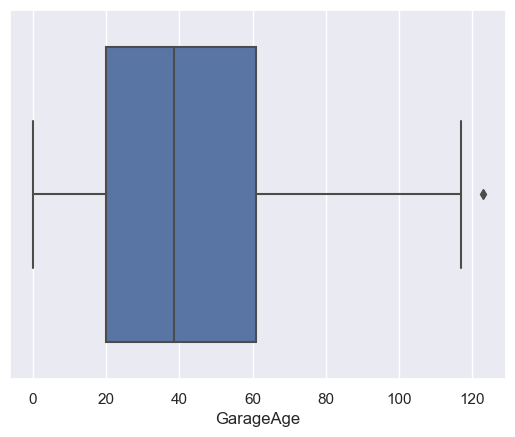

In [122]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplots(i)

Not handling the outliers as they seem to be natural outliers.

In [123]:
data = df.copy()

# 5. Encoding

In [124]:
#One hot Encoding for Categorical Variables

In [125]:
categorical_columns.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual  \
0          Gd        Typ        None     Attchd          RFn         TA   
1          TA        Typ          TA     Attchd          RFn         TA   
2          Gd        Typ          TA     Attchd          RFn         TA   
3          Gd        Typ          Gd     Detchd          Unf         TA   
4          Gd        Typ          TA     Attchd          RFn         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0         TA          Y   None  None        None       WD        Normal  
1         TA          Y   None  None        None       WD        Normal  
2         TA          Y   None  None        None       WD        Normal  
3         TA          Y   None  None        None       WD       Abnorml  
4         TA          Y   None  None        None       WD        Normal

In [126]:
categorical_columns = list(categorical_columns)

In [127]:
df_cleaned = pd.concat([data.drop(columns = categorical_columns),pd.get_dummies(data[categorical_columns])],axis = 1)

In [128]:
df_cleaned.head()

LotFrontage  LotArea  MasVnrArea  TotalBsmtSF  GrLivArea  BsmtFullBath  \
0         65.0     8450       196.0          856       1710             1   
1         80.0     9600         0.0         1262       1262             0   
2         68.0    11250       162.0          920       1786             1   
3         60.0     9550         0.0          756       1717             1   
4         84.0    14260       350.0         1145       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  BuildingAge  \
0          0            0         0        0     208500           20   
1          0            0         0        0     181500           47   
2          0            0         0        0     223500           22   
3          0            0         0        0     140000          108   
4          0            0         0        0     250000           23   

   RemodAge  GarageAge  AgeSold  MSSubClass_20  MSSubClass_30  MSSubClass_40  \
0        20       20.0       15              0              0              0   
1        47       47.0       16              1              0              0   
2        21       22.0       15              0              0              0   
3        53       25.0       17              0              0              0   
4        23       23.0       15              0              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   
3               0               0               0                 0   
4               0               0               0                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0 

In [129]:
#Dropping n+1 Dummy Variables
df_cleaned = df_cleaned.drop(['MSSubClass_20','MSZoning_C (all)','Street_Grvl','Alley_Grvl','LotShape_IR1',
                              'LandContour_Bnk','Utilities_AllPub','LotConfig_Corner','LandSlope_Gtl',
                              'Neighborhood_Blmngtn','Condition1_Artery','Condition2_Artery','BldgType_1Fam',
                              'HouseStyle_1.5Fin','OverallQual_1','OverallCond_1','RoofStyle_Flat',
                              'RoofMatl_ClyTile','Exterior1st_AsbShng','Exterior2nd_AsbShng',
                              'MasVnrType_BrkCmn','ExterQual_Ex','Foundation_BrkTil','BsmtQual_Ex','BsmtCond_Fa',
                              'BsmtExposure_Av','BsmtFinType1_ALQ','BsmtFinType2_ALQ','Heating_Floor','HeatingQC_Ex',
                              'CentralAir_N','Electrical_FuseA','KitchenQual_Ex','Functional_Maj1','FireplaceQu_Ex',
                              'GarageType_2Types','GarageFinish_Fin','GarageQual_Ex','GarageCond_Ex',
                              'PavedDrive_N','PoolQC_Ex','Fence_GdPrv','MiscFeature_Gar2',
                              'SaleType_COD','SaleCondition_Abnorml'],axis = 1)

In [130]:
df_cleaned.shape

(1460, 282)

In [131]:
df_cleaned.head()

LotFrontage  LotArea  MasVnrArea  TotalBsmtSF  GrLivArea  BsmtFullBath  \
0         65.0     8450       196.0          856       1710             1   
1         80.0     9600         0.0         1262       1262             0   
2         68.0    11250       162.0          920       1786             1   
3         60.0     9550         0.0          756       1717             1   
4         84.0    14260       350.0         1145       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  BuildingAge  \
0          0            0         0        0     208500           20   
1          0            0         0        0     181500           47   
2          0            0         0        0     223500           22   
3          0            0         0        0     140000          108   
4          0            0         0        0     250000           23   

   RemodAge  GarageAge  AgeSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0        20       20.0       15              0              0              0   
1        47       47.0       16              0              0              0   
2        21       22.0       15              0              0              0   
3        53       25.0       17              0              0              0   
4        23       23.0       15              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   
4               0               0            0            0            1   

   MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  \
0            0            1           1           0             0   
1            0            1           1           0             0   
2            0            1           1           0             0   
3            0            1        

In [132]:
df_cleaned.shape

(1460, 282)

In [133]:
df_cleaned.to_csv('advance_houseprice_train.csv',index = False)